# **TRATAMENTO DOS DADOS** 

In [1]:
# Instalando pacotes
!pip install pmdarima

# Importando Pacotes
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.tsa.stattools
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.compat.pandas import Appender
from pmdarima.arima import auto_arima
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Análise e Tratamento dos Dados**

In [2]:
# Lendo arquivos e gerando uma única base de dados
origem = "E:\\SafeBox\\02.Especialização_Ciência_de_Dados\\13 - TCC - Ciência de Dados de Big Data (2020)\\TCC-PUC\\Receita_SE\\"
origem2 = "E:\\SafeBox\\02.Especialização_Ciência_de_Dados\\13 - TCC - Ciência de Dados de Big Data (2020)\\TCC-PUC\\"
origem3 = "E:\\SafeBox\\02.Especialização_Ciência_de_Dados\\13 - TCC - Ciência de Dados de Big Data (2020)\\TCC-PUC\\Tesouro_Nacional\\"
destino = 'E:\\SafeBox\\02.Especialização_Ciência_de_Dados\\13 - TCC - Ciência de Dados de Big Data (2020)\\TCC-PUC\\'
extensao_csv = ".csv"
df =pd.DataFrame()
qtd_arq = 0
SGL_ORGAO = 'SEDUC'
COD_FONTE_RECURSO = 103000000
for x, y, z in os.walk(origem):
  print('ARQUIVOS LIDOS:')
  for arquivo in z:
    if 'Receita_SE_Consolidado' in arquivo:
      break
    if extensao_csv in arquivo:
      qtd_arq = qtd_arq + 1
      frames = pd.read_csv(origem + arquivo) 
      print(f'    Lendo arquivo: {arquivo}')
    df = df.append(frames, ignore_index=True)

csv = df.to_csv(destino + "Receita_SE_Consolidado.csv")
print('')
print('RESUMO DA BASE DE DADOS:')
print(f'    {df.shape[0]} linhas foram lidos') 
print(f'    {df.shape[1]} colunas foram lidos')
print(f'    {qtd_arq} arquivos foram lidos e consolidados')

ARQUIVOS LIDOS:
    Lendo arquivo: Receita_SE_2015.csv
    Lendo arquivo: Receita_SE_2016.csv
    Lendo arquivo: Receita_SE_2017.csv
    Lendo arquivo: Receita_SE_2018.csv
    Lendo arquivo: Receita_SE_2019.csv
    Lendo arquivo: Receita_SE_2020.csv
    Lendo arquivo: Receita_SE_2021.csv

RESUMO DA BASE DE DADOS:
    35307 linhas foram lidos
    10 colunas foram lidos
    7 arquivos foram lidos e consolidados


In [3]:
# Campos com espaços vazios na descrição
receita = pd.read_csv(destino+'Receita_SE_Consolidado.csv')
receita.dtypes


Unnamed: 0              int64
COD_ORGAO               int64
 SGL_ORGAO             object
 MES                    int64
 ANO                    int64
 COD_UNIDADE_GOV        int64
 SGL_UNIDADE_GOV       object
 COD_FONTE_RECURSO      int64
 NOM_FONTE_RECURSO     object
 COD_NATUREZA           int64
 VL_ARRECADADA        float64
dtype: object

In [4]:
# Lendo o arquivo Receita_SE_Consolidado e renomenado colunas
receita = pd.read_csv(destino+'Receita_SE_Consolidado.csv')
receita.columns = ['Unnamed: 0',
                   'COD_ORGAO',
                   'SGL_ORGAO',
                   'MES',
                   'ANO',
                   'COD_UNIDADE_GOV',
                   'SGL_UNIDADE_GOV',
                   'COD_FONTE_RECURSO',
                   'NOM_FONTE_RECURSO',
                   'COD_NATUREZA', 
                   'VL_ARRECADADO'] 

In [5]:
# Quantidade de registros com informações ausentes
receita.isna().sum()

Unnamed: 0           0
COD_ORGAO            0
SGL_ORGAO            0
MES                  0
ANO                  0
COD_UNIDADE_GOV      0
SGL_UNIDADE_GOV      0
COD_FONTE_RECURSO    0
NOM_FONTE_RECURSO    0
COD_NATUREZA         0
VL_ARRECADADO        0
dtype: int64

In [6]:
# Verificando os Tipos de Dados
receita.dtypes

Unnamed: 0             int64
COD_ORGAO              int64
SGL_ORGAO             object
MES                    int64
ANO                    int64
COD_UNIDADE_GOV        int64
SGL_UNIDADE_GOV       object
COD_FONTE_RECURSO      int64
NOM_FONTE_RECURSO     object
COD_NATUREZA           int64
VL_ARRECADADO        float64
dtype: object

In [7]:
# Convertendo Mês e Ano para String 
receita['MES'] = receita['MES'].astype(str)
receita['ANO'] = receita['ANO'].astype(str)
receita.dtypes

Unnamed: 0             int64
COD_ORGAO              int64
SGL_ORGAO             object
MES                   object
ANO                   object
COD_UNIDADE_GOV        int64
SGL_UNIDADE_GOV       object
COD_FONTE_RECURSO      int64
NOM_FONTE_RECURSO     object
COD_NATUREZA           int64
VL_ARRECADADO        float64
dtype: object

In [8]:
# Criando uma nova coluna com mês e ano
receita["ANO_MES"] = receita['MES'] + "/" + receita['ANO']
receita["ANO_MES"] = pd.to_datetime(receita["ANO_MES"])
receita.head()
receita.dtypes

Unnamed: 0                    int64
COD_ORGAO                     int64
SGL_ORGAO                    object
MES                          object
ANO                          object
COD_UNIDADE_GOV               int64
SGL_UNIDADE_GOV              object
COD_FONTE_RECURSO             int64
NOM_FONTE_RECURSO            object
COD_NATUREZA                  int64
VL_ARRECADADO               float64
ANO_MES              datetime64[ns]
dtype: object

In [9]:
# Filtrando registros apenas da SEDUC
receita = receita.loc[receita['SGL_ORGAO'] == SGL_ORGAO]
receitaseduc = receita.loc[receita['COD_FONTE_RECURSO'] == 103000000]
print('RESUMO DA BASE DE DADOS:')
print(f'    {receitaseduc.shape[0]} linhas foram lidas')
print(f'    {receitaseduc.shape[1]} colunas foram lidas')


RESUMO DA BASE DE DADOS:
    167 linhas foram lidas
    12 colunas foram lidas


In [10]:
# Excluindo colunas que não serão usadas nas previsões
df = receitaseduc.drop(['Unnamed: 0',
                    'COD_ORGAO',
                    'MES',    
                    'SGL_ORGAO',
                    'SGL_UNIDADE_GOV',
                    'COD_UNIDADE_GOV',
                    'COD_FONTE_RECURSO',
                    'NOM_FONTE_RECURSO',
                    'COD_NATUREZA'], 
                   axis=1)
df = df[['ANO_MES',
         'VL_ARRECADADO',]]
df

,ANO_MES,VL_ARRECADADO
224,2015-01-01,140588.78
233,2015-01-01,52236857.63
634,2015-02-01,11499.19
641,2015-02-01,53256959.95
1052,2015-03-01,5959.65
...,...,...
33688,2021-09-01,66928504.13
34134,2021-10-01,67131312.87
34607,2021-11-01,77238503.69
35129,2021-12-01,-2593.62


In [11]:
# Sumarizando os valores arrecadados por mês
df2 = pd.DataFrame(df.groupby(['ANO_MES'])['VL_ARRECADADO'].agg('sum'))
df2 = df2.rename_axis('ANO_MES').reset_index()
df2.sort_values(by=['ANO_MES'], ascending=False)

,ANO_MES,VL_ARRECADADO
83,2021-12-01,87150634.34
82,2021-11-01,77238503.69
81,2021-10-01,67131312.87
80,2021-09-01,66928504.13
79,2021-08-01,70035559.06
...,...,...
4,2015-05-01,52123893.45
3,2015-04-01,48121549.40
2,2015-03-01,44059688.48
1,2015-02-01,53268459.14


In [12]:
# Salvando um backup da base de dados tratada
df2.to_csv(destino + 'SerieTempotalSeduc.csv', index  = False, sep=";")
df2.to_excel(destino + 'SerieTempotalSeduc.xlsx')

In [13]:
df2.head()

,ANO_MES,VL_ARRECADADO
0,2015-01-01,52377446.41
1,2015-02-01,53268459.14
2,2015-03-01,44059688.48
3,2015-04-01,48121549.40
4,2015-05-01,52123893.45


In [14]:
df2 = df2.drop(columns='ANO_MES')
df2.head()

,VL_ARRECADADO
0,52377446.41
1,53268459.14
2,44059688.48
3,48121549.40
4,52123893.45


In [15]:
indice = pd.date_range(min(df['ANO_MES']), periods=len(df2), freq='M')
indice

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
      

# **CRIAR SÉRIE**

In [16]:
# Criando a série
serie = pd.Series(df2['VL_ARRECADADO'].values, index=indice)
serie

2015-01-31    52377446.41
2015-02-28    53268459.14
2015-03-31    44059688.48
2015-04-30    48121549.40
2015-05-31    52123893.45
                 ...     
2021-08-31    70035559.06
2021-09-30    66928504.13
2021-10-31    67131312.87
2021-11-30    77238503.69
2021-12-31    87150634.34
Freq: M, Length: 84, dtype: float64

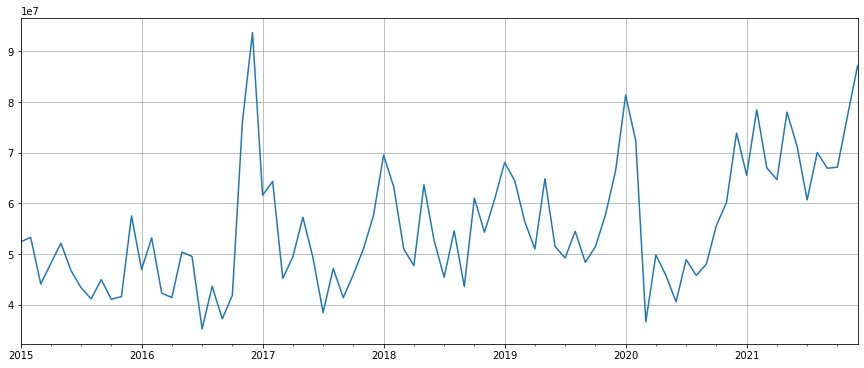

In [17]:
serie.plot()
plt.grid(True)
plt.show()

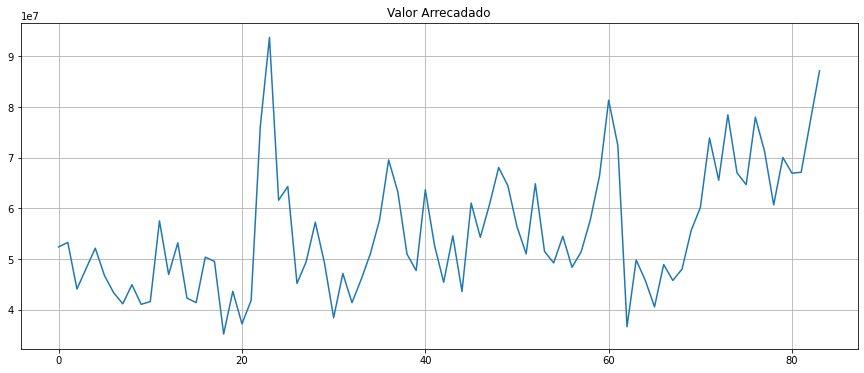

In [18]:
# Média móvel do dataframe
plt.plot(df2['VL_ARRECADADO'])
plt.title('Valor Arrecadado')
plt.grid(True)
plt.show()

**Média Móvel**

In [19]:
mediamovel = serie.rolling(window=6)
mediamovel = mediamovel.mean()

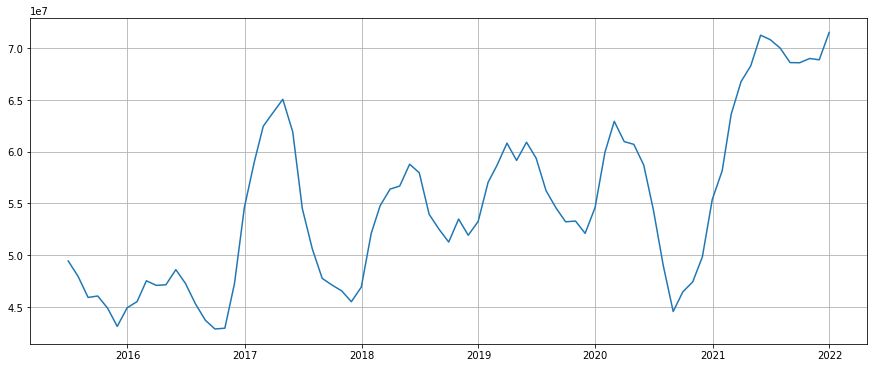

In [20]:
plt.plot(mediamovel)
plt.grid(True)

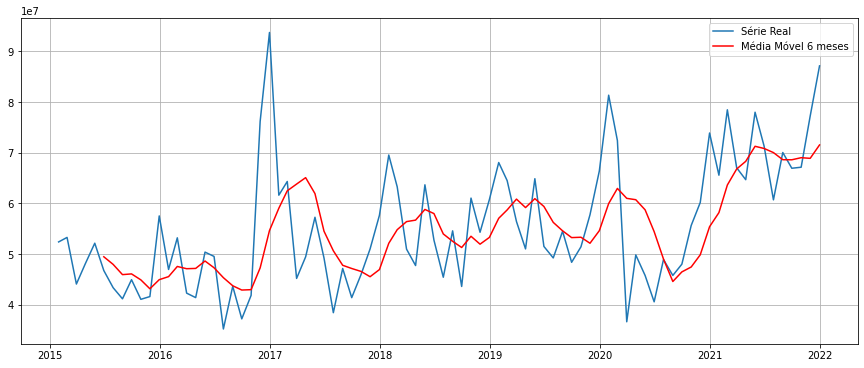

In [21]:
plt.plot(serie, label='Série Real')
plt.plot(mediamovel, color='red', label='Média Móvel 6 meses')
plt.legend(loc='best')
plt.grid(True)
plt.show()


**Decomposição**

In [22]:
#Decomposição**
decomposicao = seasonal_decompose(serie)

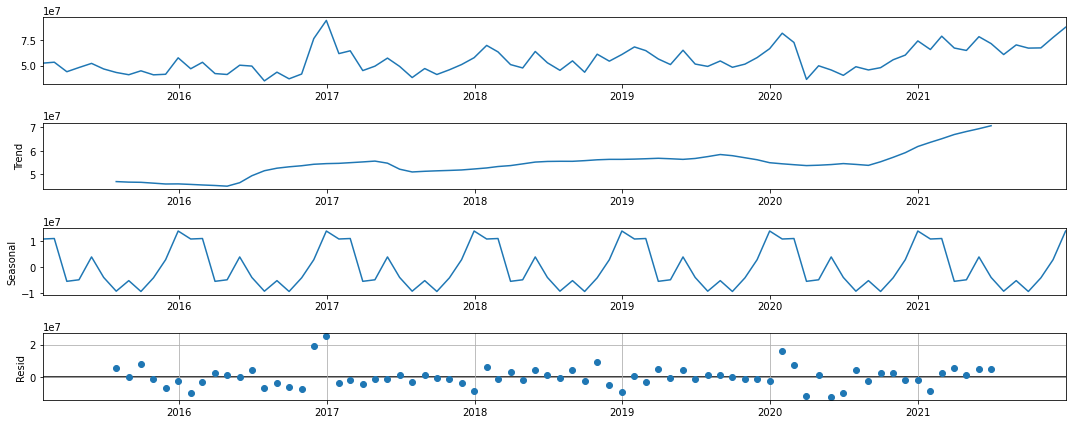

In [23]:
decomposicao.plot()
plt.grid(True);

**Normalidade e Transformação**

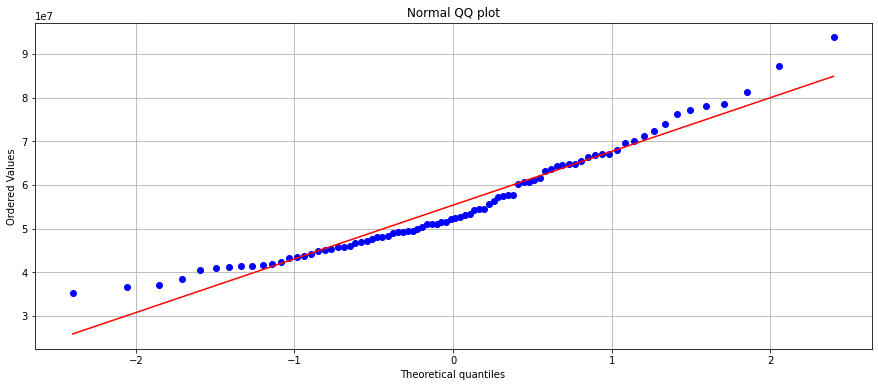

In [24]:
#**Normalidade e Transformação**
stats.probplot(serie, dist='norm', plot=plt)
plt.title("Normal QQ plot")
plt.grid(True)
plt.show()

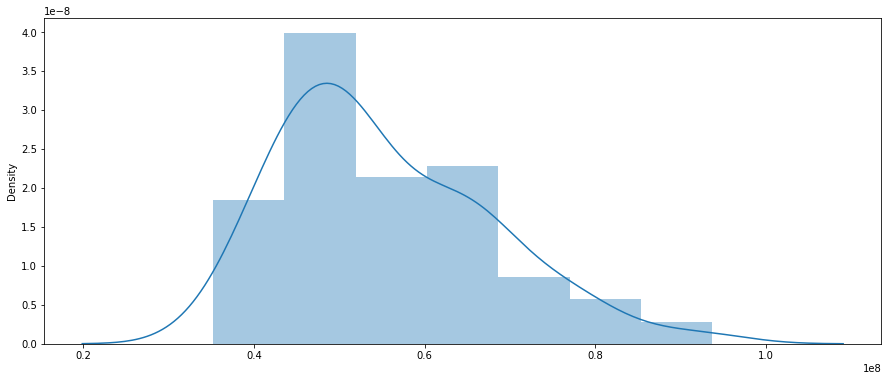

In [25]:
sns.distplot(serie);

### TESTE SHAPIRO-WILK
> *CRITÉRIOS*:
> * NÍVEL DE SIGNIFICÂNCIA DE 0,05 OU 5% (MAIS UTILIZADO)
> * Ho = Distribuição normal p > 0,05
> * Ha = Distribuição não normal p <= 0,05

In [26]:
### TESTE SHAPIRO-WILK
e, p = stats.shapiro(serie)
print(f'Estatística do teste: {e}')
print(f'p-valor: {p}')

Estatística do teste: 0.9502837061882019
p-valor: 0.002676741685718298


In [27]:
# Transformação por log(Diminuir variância e melhorar normalidade)
serie2 = np.log(serie)
serie2

2015-01-31    17.773987
2015-02-28    17.790855
2015-03-31    17.601056
2015-04-30    17.689241
2015-05-31    17.769134
                ...    
2021-08-31    18.064514
2021-09-30    18.019136
2021-10-31    18.022161
2021-11-30    18.162409
2021-12-31    18.283149
Freq: M, Length: 84, dtype: float64

In [28]:
e, p = stats.shapiro(serie2)
print(f'Estatística do teste: {e}')
print(f'p-valor: {p}')

Estatística do teste: 0.9820584654808044
p-valor: 0.29265207052230835


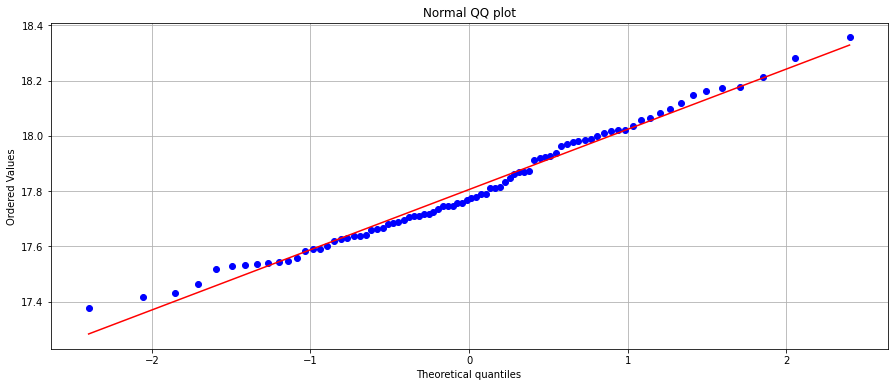

In [29]:
stats.probplot(serie2, dist='norm', plot=plt)
plt.title("Normal QQ plot")
plt.grid(True)
plt.show()

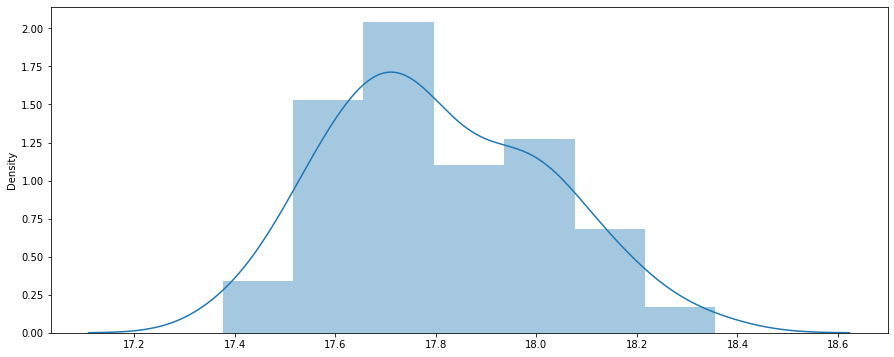

In [30]:
sns.distplot(serie2);

In [31]:
# Trasnformação por raíz cúbida (quando possui dados com valor zero ou negativos)
serie3 = (serie)**(1/3)

serie3

2015-01-31    374.152031
2015-02-28    376.261727
2015-03-31    353.194399
2015-04-30    363.730624
2015-05-31    373.547312
                 ...    
2021-08-31    412.198303
2021-09-30    406.010289
2021-10-31    406.419977
2021-11-30    425.870885
2021-12-31    443.360350
Freq: M, Length: 84, dtype: float64

In [32]:
e, p = stats.shapiro(serie3)
print(f'Estatística do teste: {e}')
print(f'p-valor: {p}')

Estatística do teste: 0.9743747115135193
p-valor: 0.09195171296596527


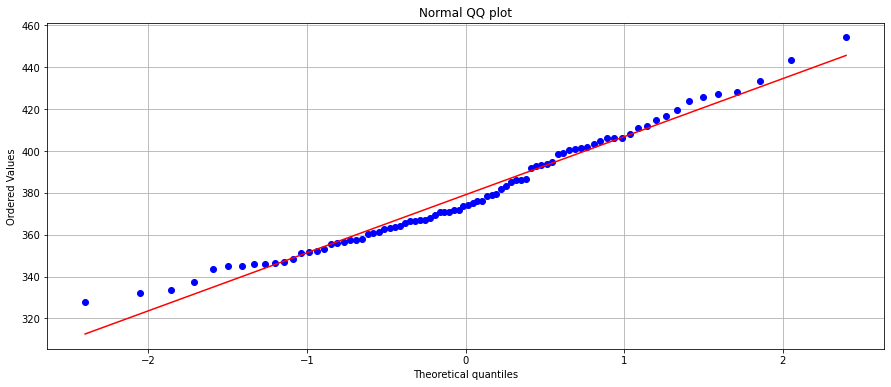

In [33]:
stats.probplot(serie3, dist='norm', plot=plt)
plt.title("Normal QQ plot")
plt.grid(True)
plt.show()

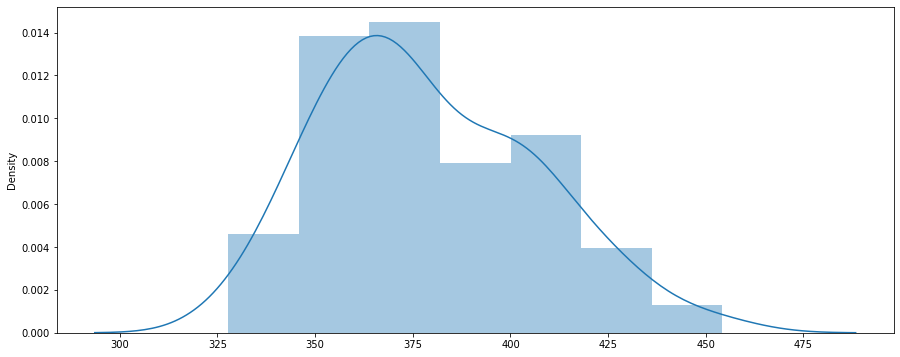

In [34]:
sns.distplot(serie3);

### Estacionariedade dos Dados
> *TESTE KPSS (KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN)*
> * Ho = Não é estacionário: estatístitica do teste > valor crítico
> * Ha = É estacionário: estatística do teste < valor crítico 


In [35]:
#Estacionariedade dos Dados
kpss = statsmodels.tsa.stattools.kpss(serie)
print('Estatística do teste: {:.4f}'.format(kpss[0]))
print('p-valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
  print('{}: {:.4f}'.format(chave, valor))

Estatística do teste: 0.5841
p-valor: 0.0241
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


In [36]:
kpss = statsmodels.tsa.stattools.kpss(serie2)
print('Estatística do teste: {:.4f}'.format(kpss[0]))
print('p-valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
  print('{}: {:.4f}'.format(chave, valor))

Estatística do teste: 0.5868
p-valor: 0.0238
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


In [37]:
kpss = statsmodels.tsa.stattools.kpss(serie3)
print('Estatística do teste: {:.4f}'.format(kpss[0]))
print('p-valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
  print('{}: {:.4f}'.format(chave, valor))

Estatística do teste: 0.5870
p-valor: 0.0238
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


**Autocorrelação**

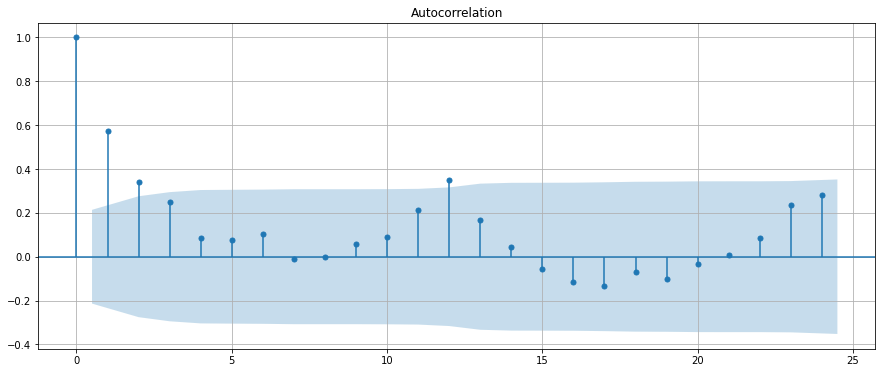

In [38]:
#**Autocorrelação**
plot_acf(serie3, lags=24)
plt.grid(True)
plt.show()

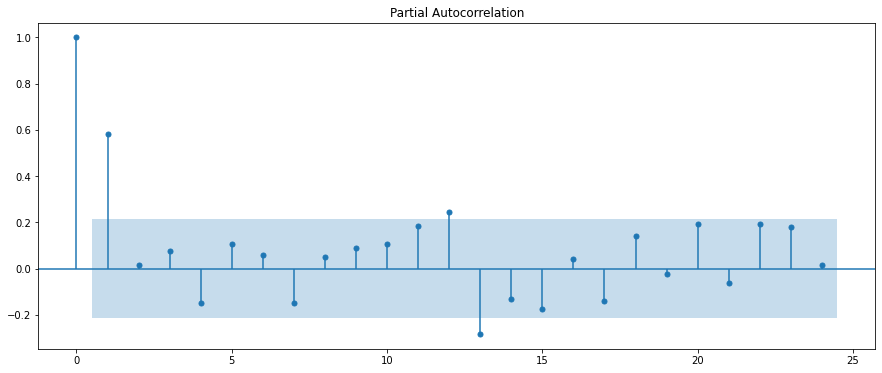

In [39]:
plot_pacf(serie3, lags=24)
plt.show()


In [40]:
# Tratando receitas federais do FUNDEB repassadas ao Estado de Sergipe
rec_fed_fundeb = pd.read_csv(origem3 + 'detalhamento_transferencias.csv', sep=';', encoding = 'utf-8')

In [41]:
# Quantidade de registros com informações ausentes
rec_fed_fundeb.isna().sum()

UF               0
Ano              0
Mês              0
Transferência    0
1º Decêndio      0
2º Decêndio      0
3º Decêndio      0
Total            0
dtype: int64

In [42]:
rec_fed_fundeb.dtypes

UF               object
Ano               int64
Mês               int64
Transferência    object
1º Decêndio      object
2º Decêndio      object
3º Decêndio      object
Total            object
dtype: object

In [43]:
# Convertendo Mês e Ano para String 
rec_fed_fundeb['Mês'] = rec_fed_fundeb['Mês'].astype(str)
rec_fed_fundeb['Ano'] = rec_fed_fundeb['Ano'].astype(str)
rec_fed_fundeb['Total'] = rec_fed_fundeb['Total'].astype(str)
rec_fed_fundeb.dtypes

UF               object
Ano              object
Mês              object
Transferência    object
1º Decêndio      object
2º Decêndio      object
3º Decêndio      object
Total            object
dtype: object

In [44]:
rec_fed_fundeb['VL_ARREC_FED'] = rec_fed_fundeb['Total'].apply(lambda v: v
                                                                .replace('.','')
                                                                .replace('R$ ','')
                                                                .replace(',','.'))
rec_fed_fundeb.to_excel(destino + 'FUNDEB.xlsx')
rec_fed_fundeb

,UF,Ano,Mês,Transferência,1º Decêndio,2º Decêndio,3º Decêndio,Total,VL_ARREC_FED
0,SE,2021,1,FUNDEB/COUN,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.00
1,SE,2021,2,FUNDEB/COUN,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.00
2,SE,2021,3,FUNDEB/COUN,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.00
3,SE,2021,4,FUNDEB/COUN,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.00
4,SE,2021,5,FUNDEB/COUN,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.00
...,...,...,...,...,...,...,...,...,...
89,SE,2021,1,FUNDEB/LC 87,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.00
90,SE,2021,2,FUNDEB/LC 87,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.00
91,SE,2021,3,FUNDEB/LC 87,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.00
92,SE,2021,4,FUNDEB/LC 87,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.00


In [45]:
# Criando uma nova coluna com mês e ano
rec_fed_fundeb['ANO_MES'] = rec_fed_fundeb['Mês'] + "/" + rec_fed_fundeb['Ano']
rec_fed_fundeb['ANO_MES'] = pd.to_datetime(rec_fed_fundeb['ANO_MES'])
rec_fed_fundeb['VL_ARREC_FED'] = rec_fed_fundeb['VL_ARREC_FED'].astype(float)
rec_fed_fundeb.head()

,UF,Ano,Mês,Transferência,1º Decêndio,2º Decêndio,3º Decêndio,Total,VL_ARREC_FED,ANO_MES
0,SE,2021,1,FUNDEB/COUN,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.0,2021-01-01
1,SE,2021,2,FUNDEB/COUN,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.0,2021-02-01
2,SE,2021,3,FUNDEB/COUN,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.0,2021-03-01
3,SE,2021,4,FUNDEB/COUN,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.0,2021-04-01
4,SE,2021,5,FUNDEB/COUN,"R$ 0,00","R$ 0,00","R$ 0,00","R$ 0,00",0.0,2021-05-01


In [46]:
rec_fed_fundeb.dtypes

UF                       object
Ano                      object
Mês                      object
Transferência            object
1º Decêndio              object
2º Decêndio              object
3º Decêndio              object
Total                    object
VL_ARREC_FED            float64
ANO_MES          datetime64[ns]
dtype: object

In [47]:
# Excluindo colunas que não serão usadas nas previsões
rec_fed_fundeb = rec_fed_fundeb.drop(['UF',
                                      'Ano',
                                      'Mês',    
                                      'Transferência',
                                      '1º Decêndio',
                                      '2º Decêndio',
                                      '3º Decêndio'
                       ], 
                   axis=1)
rec_fed_fundeb = rec_fed_fundeb[['ANO_MES',
                                 'VL_ARREC_FED',]]
rec_fed_fundeb

,ANO_MES,VL_ARREC_FED
0,2021-01-01,0.0
1,2021-02-01,0.0
2,2021-03-01,0.0
3,2021-04-01,0.0
4,2021-05-01,0.0
...,...,...
89,2021-01-01,0.0
90,2021-02-01,0.0
91,2021-03-01,0.0
92,2021-04-01,0.0


In [48]:
# Sumarizando os valores arrecadados por mês
rec_fed_fundeb = pd.DataFrame(rec_fed_fundeb.groupby(['ANO_MES'])['VL_ARREC_FED'].agg('sum'))
rec_fed_fundeb = rec_fed_fundeb.rename_axis('ANO_MES').reset_index()
rec_fed_fundeb.sort_values(by=['ANO_MES'], ascending=True)

,ANO_MES,VL_ARREC_FED
0,2021-01-01,65557080.29
1,2021-02-01,78474178.70
2,2021-03-01,67007997.68
3,2021-04-01,64669263.16
4,2021-05-01,72381664.42
5,2021-06-01,71298380.07
6,2021-07-01,60688195.10
7,2021-08-01,70031710.50
8,2021-09-01,66928504.13
9,2021-10-01,67131312.87


In [49]:
rec_fed_fundeb = rec_fed_fundeb.drop(['ANO_MES'], axis=1)
rec_fed_fundeb

,VL_ARREC_FED
0,65557080.29
1,78474178.70
2,67007997.68
3,64669263.16
4,72381664.42
5,71298380.07
6,60688195.10
7,70031710.50
8,66928504.13
9,67131312.87


# **MODELO AR**

> * Modelo arima:(p=ordem de autorregressão, d=grau de diferenciação, q=ordem de média móvel)
> * Modelo ar:(p,0,0)

> * Melhor AIC:764.276 = (1,0,0)    AIC                                                    

In [50]:
#MODELO AR
x = [1,2,3,4,5,6,7,8,9,10]
for v in x:
  if v > 10:
    break
  modelo_ar = ARIMA(serie3, order = (v,0,0))
  resultado = modelo_ar.fit()
  print(f'-------------------------PASSANDO POR:({v},0,0)------------------------------')
  print(resultado.summary()) 
print('ACABOU O LAÇO.')


-------------------------PASSANDO POR:(1,0,0)------------------------------
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   84
Model:                     ARMA(1, 0)   Log Likelihood                -379.138
Method:                       css-mle   S.D. of innovations             22.018
Date:                Sun, 10 Apr 2022   AIC                            764.276
Time:                        16:36:14   BIC                            771.568
Sample:                    01-31-2015   HQIC                           767.208
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        380.1895      6.037     62.976      0.000     368.357     392.022
ar.L1.y        0.6084      0.089      6.802      0.000 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   84
Model:                     ARMA(6, 0)   Log Likelihood                -377.276
Method:                       css-mle   S.D. of innovations             21.509
Date:                Sun, 10 Apr 2022   AIC                            770.553
Time:                        16:36:15   BIC                            789.999
Sample:                    01-31-2015   HQIC                           778.370
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        380.7540      7.189     52.961      0.000     366.663     394.845
ar.L1.y        0.6123      0.110      5.567      0.000       0.397       0.828
ar.L2.y       -0.0251      0.129     -0.195      0.8

-------------------------PASSANDO POR:(10,0,0)------------------------------
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   84
Model:                    ARMA(10, 0)   Log Likelihood                -375.581
Method:                       css-mle   S.D. of innovations             21.026
Date:                Sun, 10 Apr 2022   AIC                            775.163
Time:                        16:36:17   BIC                            804.332
Sample:                    01-31-2015   HQIC                           786.889
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        381.8040      9.539     40.026      0.000     363.108     400.500
ar.L1.y        0.6087      0.109      5.568      0.000

> * Melhor AIC:764.276 = (1,0,0)

In [51]:
# MELHOR RESULTADO
modelo_ar = ARIMA(serie3,order = (1,0,0))
resultado_ar = modelo_ar.fit()
print(resultado_ar.summary()) 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   84
Model:                     ARMA(1, 0)   Log Likelihood                -379.138
Method:                       css-mle   S.D. of innovations             22.018
Date:                Sun, 10 Apr 2022   AIC                            764.276
Time:                        16:36:18   BIC                            771.568
Sample:                    01-31-2015   HQIC                           767.208
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        380.1895      6.037     62.976      0.000     368.357     392.022
ar.L1.y        0.6084      0.089      6.802      0.000       0.433       0.784
                                    Roots           

**Análise dos Resíduos**

In [52]:
#**Análise dos Resíduos**
residuos_ar = resultado_ar.resid

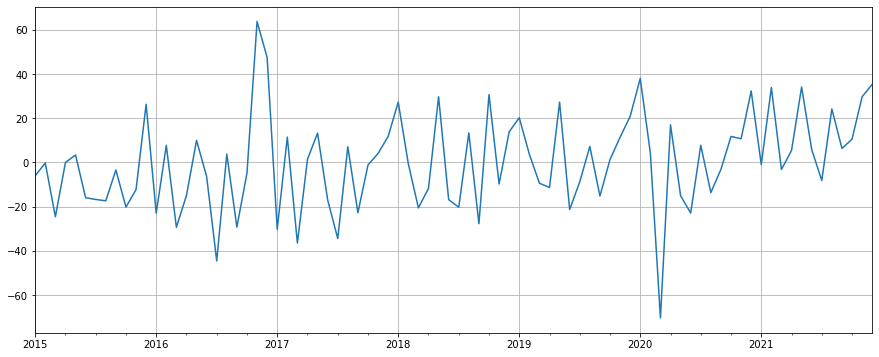

In [53]:
residuos_ar.plot()
plt.grid(True)
plt.show()

**Normalidade**

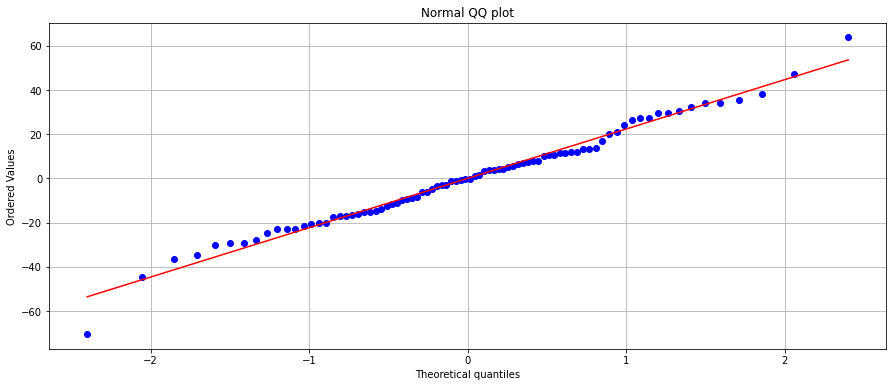

In [54]:
#**Normalidade**
stats.probplot(residuos_ar, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.grid(True)
plt.show()

In [55]:
e, p = stats.shapiro(residuos_ar)
print(f'Estatística do teste: {e}')
print(f'p-valor: {p}')

Estatística do teste: 0.9888713359832764
p-valor: 0.6927506923675537


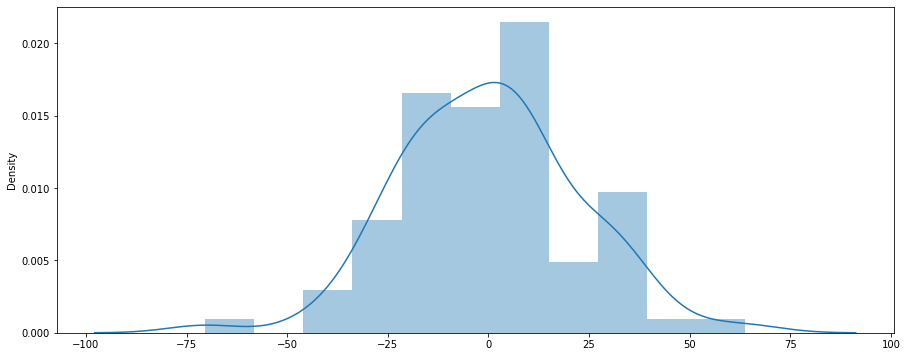

In [56]:
sns.distplot(residuos_ar);

**Autocorrelação**

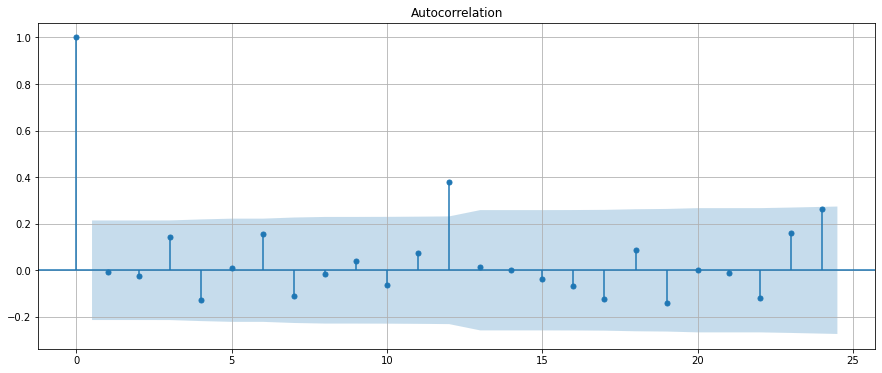

In [57]:
#**Autocorrelação**
plot_acf(residuos_ar, lags=24)
plt.grid(True)
plt.show()

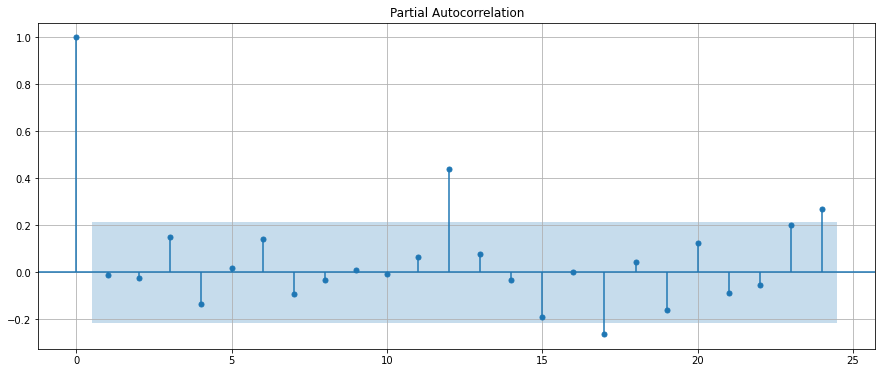

In [58]:
plot_pacf(residuos_ar, lags=24)
plt.grid(True)
plt.show()

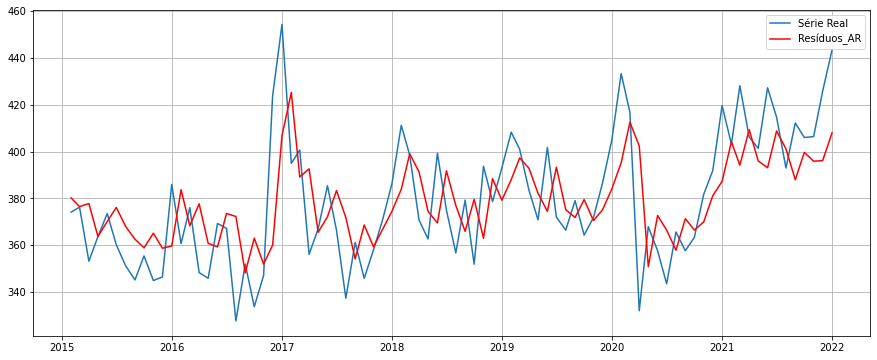

In [59]:
plt.plot(serie3, label='Série Real')
plt.plot(serie3-residuos_ar,color='red', label='Resíduos_AR')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**Previsão da Série Temporal**

In [60]:
#**Previsão da Série Temporal**
resultado_ar.fittedvalues

2015-01-31    380.189543
2015-02-28    376.516090
2015-03-31    377.799710
2015-04-30    363.764664
2015-05-31    370.175307
                 ...    
2021-08-31    387.970440
2021-09-30    399.664898
2021-10-31    395.899873
2021-11-30    396.149143
2021-12-31    407.983821
Freq: M, Length: 84, dtype: float64

In [61]:
previsao_ar = resultado_ar.predict(start=len(df2), end=len(df2)+11)
previsao_ar

2022-01-31    418.625080
2022-02-28    403.575195
2022-03-31    394.418269
2022-04-30    388.846845
2022-05-31    385.456977
2022-06-30    383.394452
2022-07-31    382.139532
2022-08-31    381.375991
2022-09-30    380.911424
2022-10-31    380.628763
2022-11-30    380.456782
2022-12-31    380.352141
Freq: M, dtype: float64

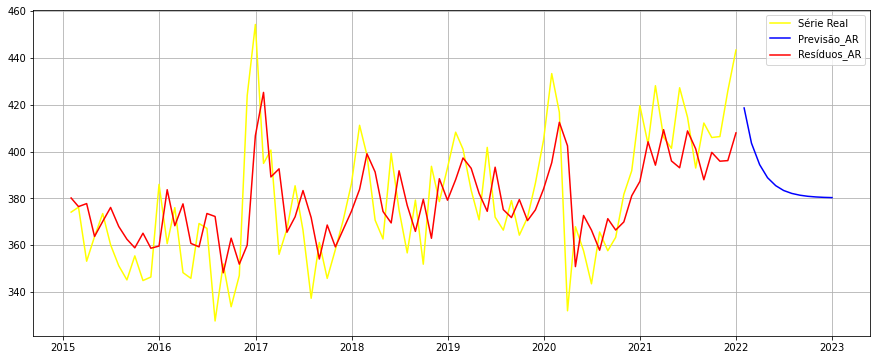

In [62]:
plt.plot(serie3, color='yellow', label='Série Real')
plt.plot(previsao_ar, color='blue', label='Previsão_AR')
plt.plot(serie3-residuos_ar,color='red', label='Resíduos_AR')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [63]:
prev_escala_ar = pd.DataFrame(previsao_ar**3, columns=['Previsão_AR'])
prev_escala_ar.to_csv(destino + 'Previsao_AR.csv', index  = False, sep=";")
prev_escala_ar.to_excel(destino + 'Previsao_AR.xlsx')
prev_escala_ar
#pd.concat([serie,prev_escala_ar]).plot();



,Previsão_AR
2022-01-31,7.336277e+07
2022-02-28,6.573148e+07
2022-03-31,6.135798e+07
2022-04-30,5.879437e+07
2022-05-31,5.727007e+07
2022-06-30,5.635565e+07
2022-07-31,5.580407e+07
2022-08-31,5.547024e+07
2022-09-30,5.526778e+07
2022-10-31,5.514483e+07


# **MODELO MA**

> * Modelo arima:(p=ordem de autorregressão, d=grau de diferenciação, q=ordem de média móvel)
> * Modelo ar:(0,0,q)

In [64]:
# **MODELO MA**
x = [1,2,3,4,5,6,7,8,9,10]
for v in x:
  if v > 10:
    break
  modelo_ma = ARIMA(serie3, order = (0,0,v))
  resultado_ma = modelo_ma.fit()
  print(f'-------------------------PASSANDO POR:(0,0,{v})------------------------------')
  print(resultado_ma.summary()) 
print('ACABOU O LAÇO.')

-------------------------PASSANDO POR:(0,0,1)------------------------------
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   84
Model:                     ARMA(0, 1)   Log Likelihood                -382.961
Method:                       css-mle   S.D. of innovations             23.058
Date:                Sun, 10 Apr 2022   AIC                            771.922
Time:                        16:36:20   BIC                            779.214
Sample:                    01-31-2015   HQIC                           774.853
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        379.3681      3.870     98.026      0.000     371.783     386.953
ma.L1.y        0.5447      0.082      6.639      0.000 

-------------------------PASSANDO POR:(0,0,6)------------------------------
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   84
Model:                     ARMA(0, 6)   Log Likelihood                -376.695
Method:                       css-mle   S.D. of innovations             21.312
Date:                Sun, 10 Apr 2022   AIC                            769.391
Time:                        16:36:20   BIC                            788.837
Sample:                    01-31-2015   HQIC                           777.208
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        380.6747      7.071     53.833      0.000     366.815     394.534
ma.L1.y        0.6316      0.108      5.869      0.000 

-------------------------PASSANDO POR:(0,0,10)------------------------------
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   84
Model:                    ARMA(0, 10)   Log Likelihood                -375.777
Method:                       css-mle   S.D. of innovations             21.050
Date:                Sun, 10 Apr 2022   AIC                            775.555
Time:                        16:36:23   BIC                            804.725
Sample:                    01-31-2015   HQIC                           787.281
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        380.3058      6.250     60.848      0.000     368.056     392.556
ma.L1.y        0.5546      0.113      4.895      0.000

> * Melhor AR: AIC = 764.276  = (1,0,0)   
> * Melhor MA: AIC = 766.462 = (0,0,3)                                                                           


In [65]:
# MELHOR RESULTADO
modelo_ma = ARIMA(serie3, order = (0,0,3))
resultado_ma = modelo_ma.fit()
print(resultado_ma.summary()) 

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   84
Model:                     ARMA(0, 3)   Log Likelihood                -378.231
Method:                       css-mle   S.D. of innovations             21.772
Date:                Sun, 10 Apr 2022   AIC                            766.462
Time:                        16:36:24   BIC                            778.616
Sample:                    01-31-2015   HQIC                           771.348
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        379.9423      5.204     73.012      0.000     369.743     390.142
ma.L1.y        0.5919      0.104      5.665      0.000       0.387       0.797
ma.L2.y        0.3514      0.116      3.034      0.0

**Análise dos Resíduos**

In [66]:
#**Análise dos Resíduos**
residuos_ma = resultado_ma.resid

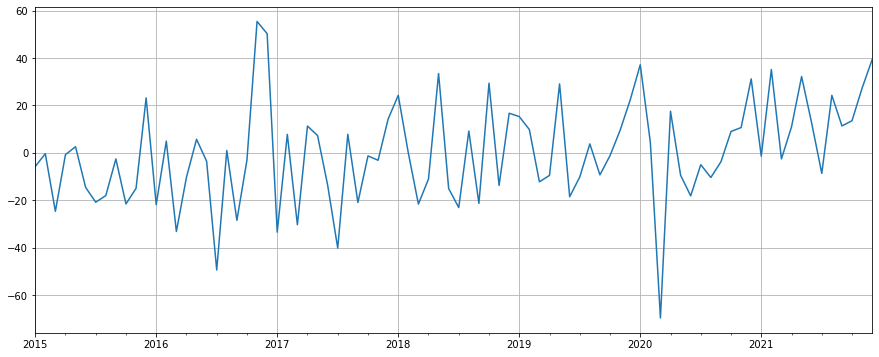

In [67]:
residuos_ma.plot()
plt.grid(True)
plt.show()

**Normalidade**

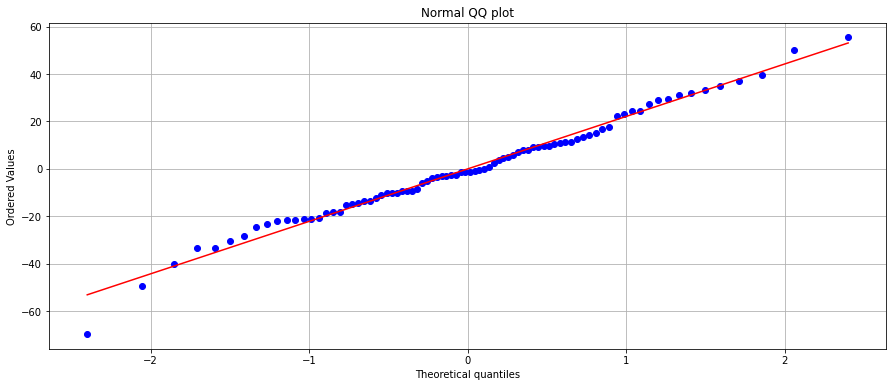

In [68]:
#**Normalidade**
stats.probplot(residuos_ma, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.grid(True)
plt.show()

In [69]:
e, p = stats.shapiro(residuos_ma)
print('Estatpistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatpistica de teste: 0.9896876811981201
p-valor: 0.7489044070243835


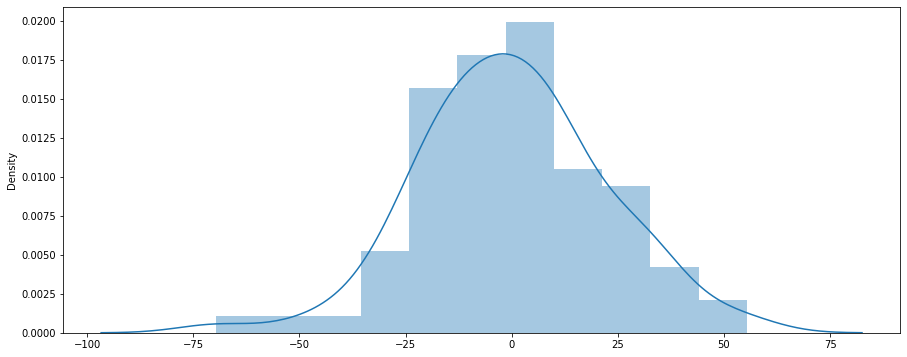

In [70]:
sns.distplot(residuos_ma);

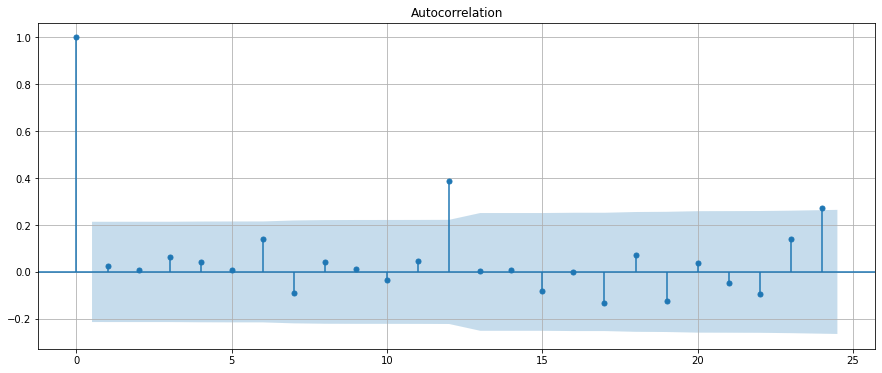

In [71]:
plot_acf(residuos_ma, lags=24)
plt.grid(True)
plt.show()

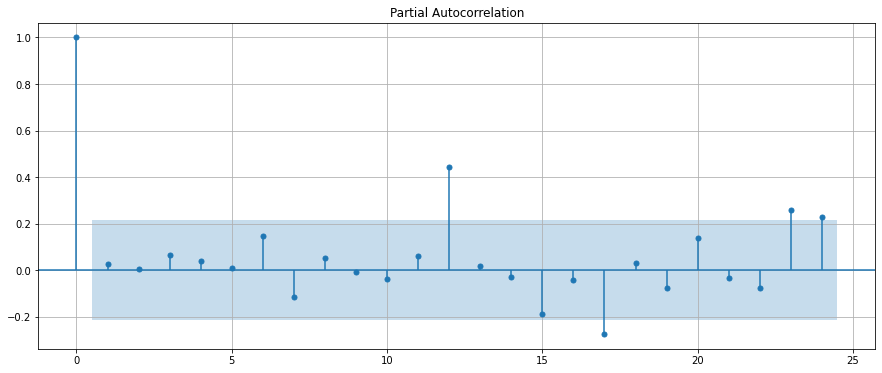

In [72]:
plot_pacf(residuos_ma, lags=24)
plt.grid(True)
plt.show()

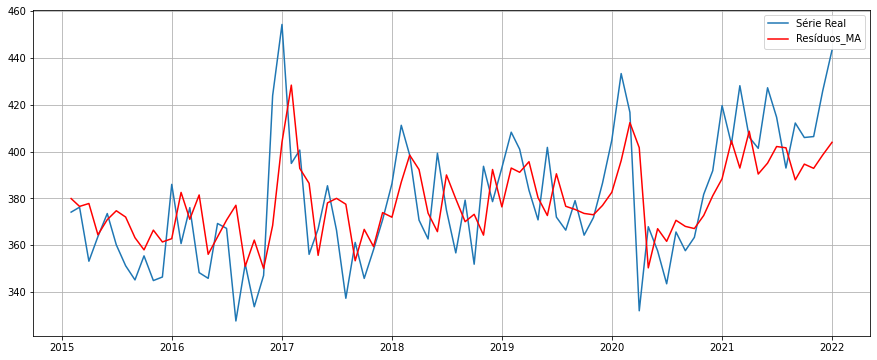

In [73]:
plt.plot(serie3, label="Série Real")
plt.plot(serie3-residuos_ma, color="red", label="Resíduos_MA")
plt.legend(loc="best")
plt.grid(True)
plt.show()

**Previsão da Série Temporal**

In [74]:
# **Previsão da Série Temporal**
resultado_ma.fittedvalues

2015-01-31    379.942301
2015-02-28    376.592587
2015-03-31    377.834627
2015-04-30    364.478994
2015-05-31    370.945473
                 ...    
2021-08-31    387.935205
2021-09-30    394.650522
2021-10-31    392.850145
2021-11-30    398.538032
2021-12-31    403.965541
Freq: M, Length: 84, dtype: float64

In [75]:
previsao_ma = resultado_ma.predict(start=len(df2), end=len(df2)+11)
previsao_ma

2022-01-31    416.539817
2022-02-28    401.189667
2022-03-31    390.613176
2022-04-30    379.942301
2022-05-31    379.942301
2022-06-30    379.942301
2022-07-31    379.942301
2022-08-31    379.942301
2022-09-30    379.942301
2022-10-31    379.942301
2022-11-30    379.942301
2022-12-31    379.942301
Freq: M, dtype: float64

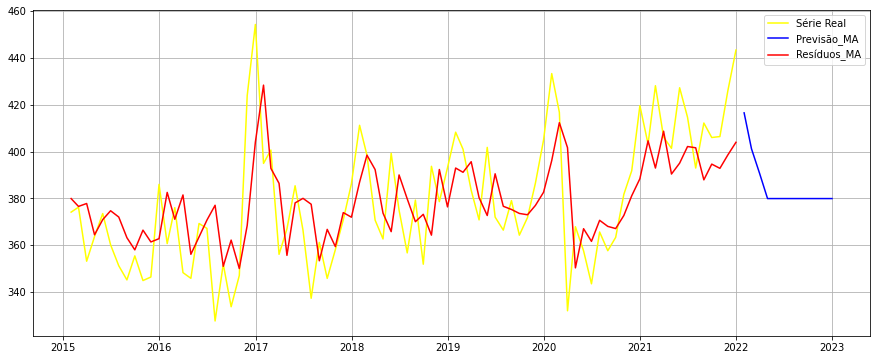

In [76]:
plt.plot(serie3, color='yellow', label='Série Real')
plt.plot(previsao_ma, color='blue', label='Previsão_MA')
plt.plot(serie3-residuos_ma,color='red', label='Resíduos_MA')
plt.legend(loc='best')
plt.grid(True)
plt.show()

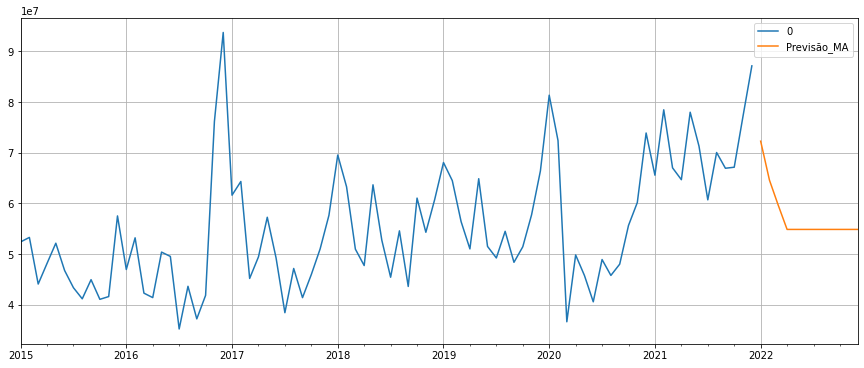

In [77]:
prev_escala_ma = pd.DataFrame(previsao_ma**3, columns=['Previsão_MA'])
prev_escala_ma.to_csv(destino + 'Previsao_MA.csv', index  = False, sep=";")
prev_escala_ma.to_excel(destino + 'Previsao_MA.xlsx')
prev_escala_ma
pd.concat([serie, prev_escala_ma]).plot()
plt.grid(True)

# **MODELO ARMA**


> * Modelo arima:(p=ordem de autorregressão, d=grau de diferenciação, q=ordem de média móvel)
> * Modelo ar:(p,0,q)

In [78]:
# **MODELO ARMA**
modelo_arma = ARIMA(serie3, order = (3,0,2)) #764.284 = (3,0,2)
resultado_arma = modelo_arma.fit()
print(resultado_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   84
Model:                     ARMA(3, 2)   Log Likelihood                -375.142
Method:                       css-mle   S.D. of innovations             20.495
Date:                Sun, 10 Apr 2022   AIC                            764.284
Time:                        16:36:26   BIC                            781.300
Sample:                    01-31-2015   HQIC                           771.124
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        380.8945      6.703     56.827      0.000     367.757     394.032
ar.L1.y       -0.3338      0.087     -3.820      0.000      -0.505      -0.163
ar.L2.y       -0.3073      0.090     -3.428      0.0

> * Melhor AR: AIC = 764.276  = (1,0,0)   
> * Melhor MA: AIC = 766.462 = (0,0,3)                                                                                                                                            
> * Melhor ARMA: AIC = 764.284 = (3,0,2)


**Análise dos Resíduos**

In [79]:
#**Análise dos Resíduos**
residuos_arma = resultado_arma.resid

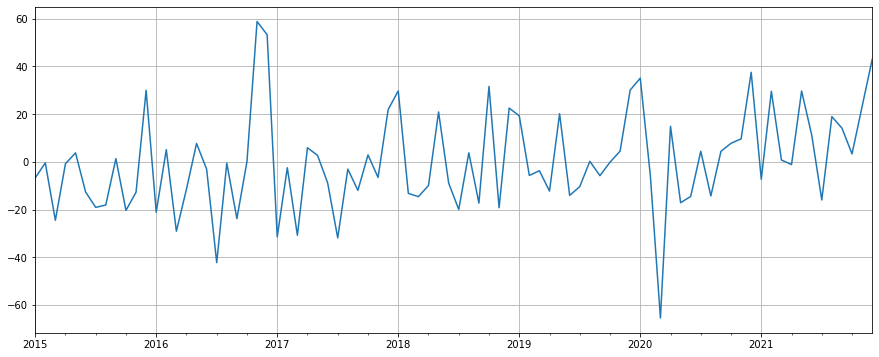

In [80]:
residuos_arma.plot()
plt.grid(True)
plt.show()

**Normalidade**

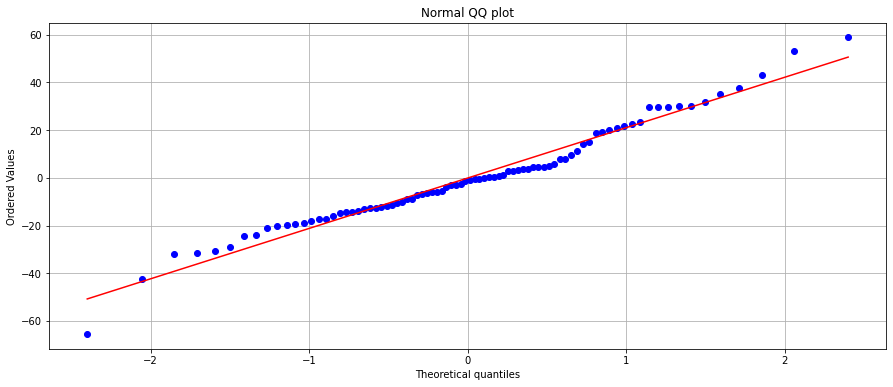

In [81]:
#**Normalidade**
stats.probplot(residuos_arma, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.grid(True)
plt.show()

In [82]:
e, p = stats.shapiro(residuos_arma)
print('Estatistica de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatistica de teste: 0.9759899377822876
p-valor: 0.11785343289375305


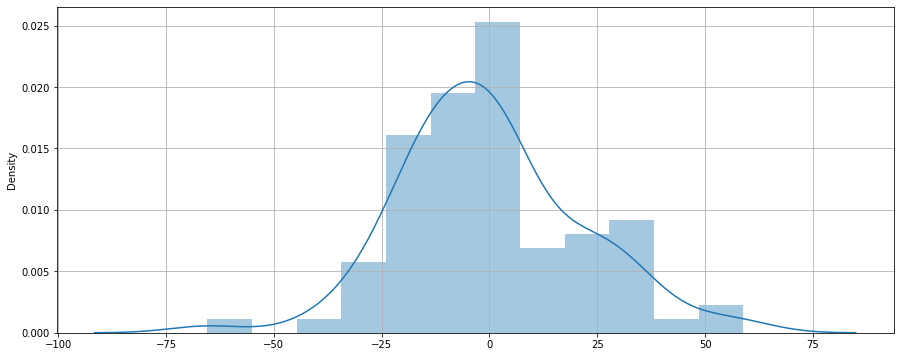

In [83]:
sns.distplot(residuos_arma)
plt.grid(True)

**Autocorrelação**

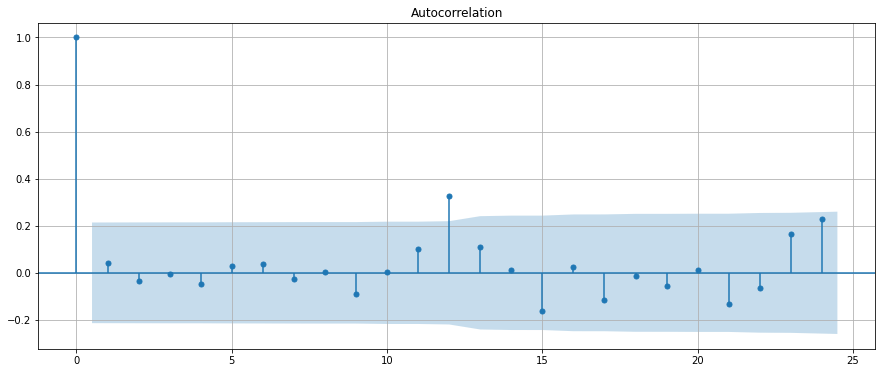

In [84]:
#**Autocorrelação**
plot_acf(residuos_arma, lags=24)
plt.grid(True)
plt.show()

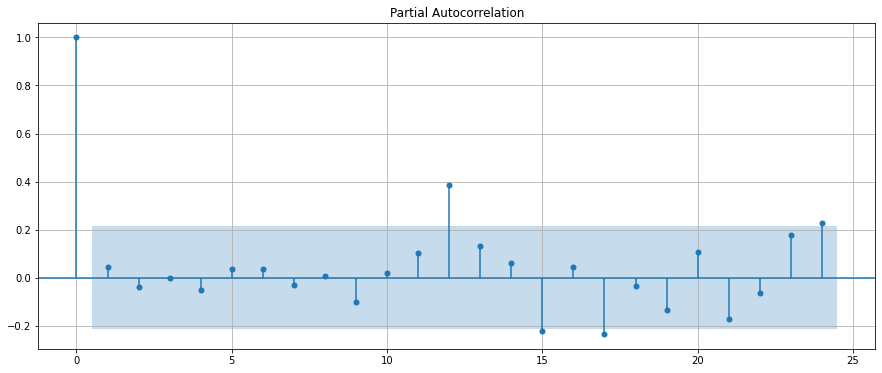

In [85]:
plot_pacf(residuos_arma, lags=24)
plt.grid(True)
plt.show()

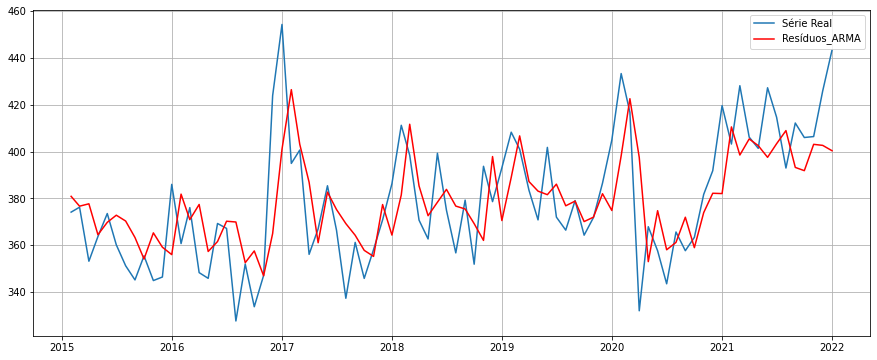

In [86]:
plt.plot(serie3, label="Série Real")
plt.plot(serie3-residuos_arma, color="red", label="Resíduos_ARMA")
plt.legend(loc="best")
plt.grid(True)
plt.show()

**Previsão da Série Temporal**

In [87]:
#**Previsão da Série Temporal**
resultado_arma.fittedvalues

2015-01-31    380.894538
2015-02-28    376.692685
2015-03-31    377.707597
2015-04-30    364.508419
2015-05-31    369.792134
                 ...    
2021-08-31    393.244829
2021-09-30    391.857737
2021-10-31    403.093796
2021-11-30    402.652825
2021-12-31    400.366565
Freq: M, Length: 84, dtype: float64

In [88]:
precisao_arma = resultado_arma.predict(start=len(df2), end=len(df2)+11)
precisao_arma

2022-01-31    428.185034
2022-02-28    419.015325
2022-03-31    395.454955
2022-04-30    395.978410
2022-05-31    396.905344
2022-06-30    380.662076
2022-07-31    386.149940
2022-08-31    389.930395
2022-09-30    376.107504
2022-10-31    383.233991
2022-11-30    387.633969
2022-12-31    374.721063
Freq: M, dtype: float64

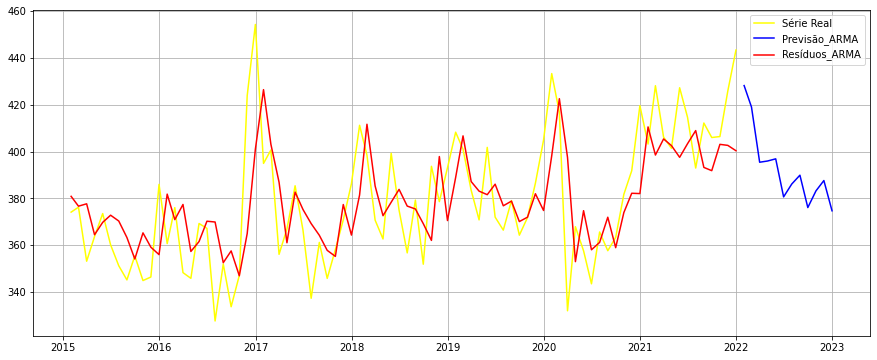

In [89]:
plt.plot(serie3, color='yellow', label='Série Real')
plt.plot(precisao_arma, color='blue', label='Previsão_ARMA')
plt.plot(serie3-residuos_arma,color='red', label='Resíduos_ARMA')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [90]:
prev_escala_arma = pd.DataFrame(precisao_arma**3, columns=["Previsão_ARMA"])
prev_escala_arma.to_csv(destino + 'Previsao_ARMA.csv', index  = False, sep=";")
prev_escala_arma.to_excel(destino + 'Previsao_ARMA.xlsx')
prev_escala_arma
# pd.concat([serie,prev_escala_arma]).plot();
# plt.grid(True)

,Previsão_ARMA
2022-01-31,7.850448e+07
2022-02-28,7.356813e+07
2022-03-31,6.184307e+07
2022-04-30,6.208898e+07
2022-05-31,6.252603e+07
2022-06-30,5.515931e+07
2022-07-31,5.757950e+07
2022-08-31,5.928724e+07
2022-09-30,5.320298e+07
2022-10-31,5.628492e+07


# **MODELO ARIMA**

> * Modelo arima:(p=ordem de autorregressão, d=grau de diferenciação, q=ordem de média móvel)
> * Modelo ar:(p,0,q)

In [91]:
# **MODELO ARIMA**
modelo_arima = ARIMA(serie3, order=(1,1,1)) #  753.039 (1,1,1)
resultado_arima = modelo_arima.fit() 
print(resultado_arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   83
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -372.520
Method:                       css-mle   S.D. of innovations             21.091
Date:                Sun, 10 Apr 2022   AIC                            753.039
Time:                        16:36:27   BIC                            762.714
Sample:                    02-28-2015   HQIC                           756.926
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5868      0.179      3.274      0.001       0.236       0.938
ar.L1.D.y      0.4876      0.100      4.869      0.000       0.291       0.684
ma.L1.D.y     -1.0000      0.035    -28.498      0.0

> * Melhor AR: AIC = 764.276  = (1,0,0)   
> * Melhor MA: AIC = 766.462 = (0,0,3)                                                                                                                                            
> * Melhor ARMA: AIC = 764.284 = (3,0,2)
> * Melhor ARIMA: AIC = 753.039 = (1,1,1)

**Análise dos Resíduos**

In [92]:
#**Análise dos Resíduos**
residuos_arima = resultado_arima.resid

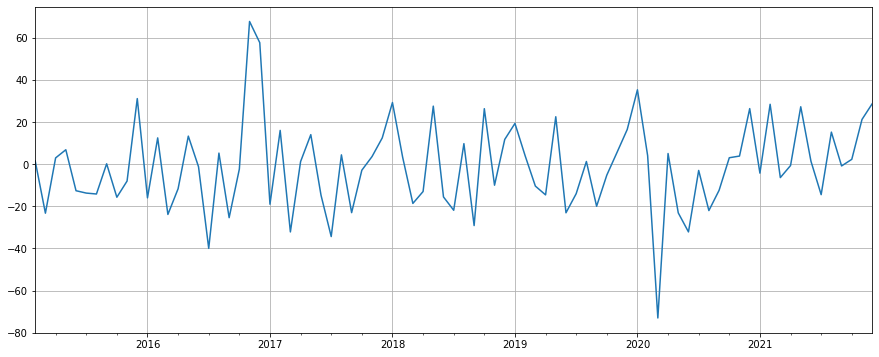

In [93]:
residuos_arima.plot()
plt.grid(True)
plt.show()

**Normalidade**

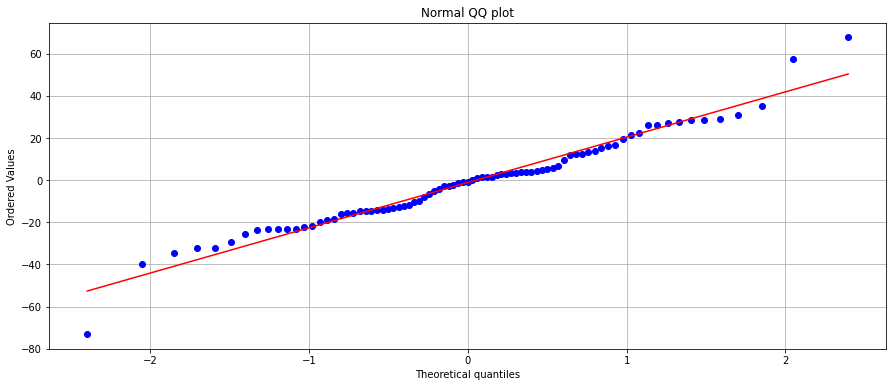

In [94]:
# **Normalidade**
stats.probplot(residuos_arima, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.grid(True)
plt.show()

In [95]:
e, p = stats.shapiro(residuos_arima)
print("Estatística de teste: {}".format(e))
print("p-valor: {}".format(p))

Estatística de teste: 0.9714762568473816
p-valor: 0.061589792370796204


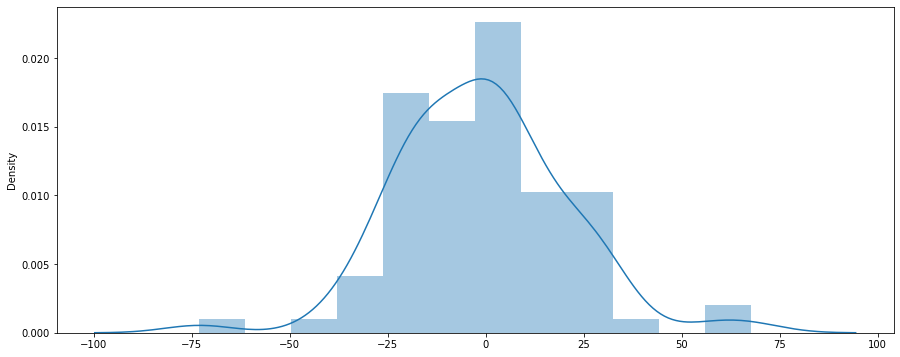

In [96]:
sns.distplot(residuos_arima);

**Autocorrelação**

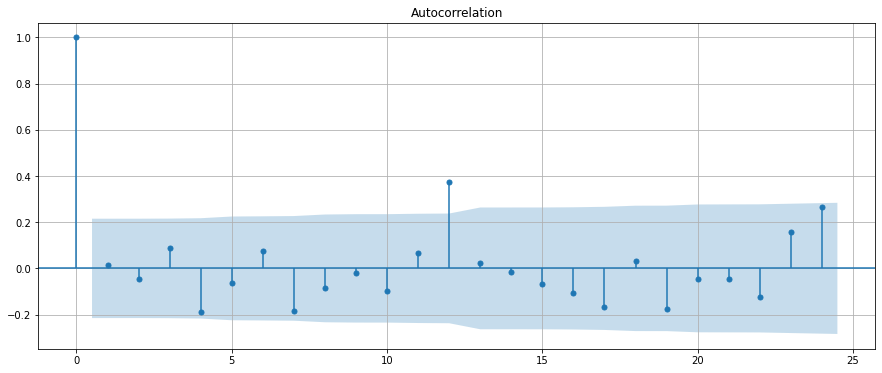

In [97]:
#**Autocorrelação**
plot_acf(residuos_arima, lags=24)
plt.grid(True)
plt.show()

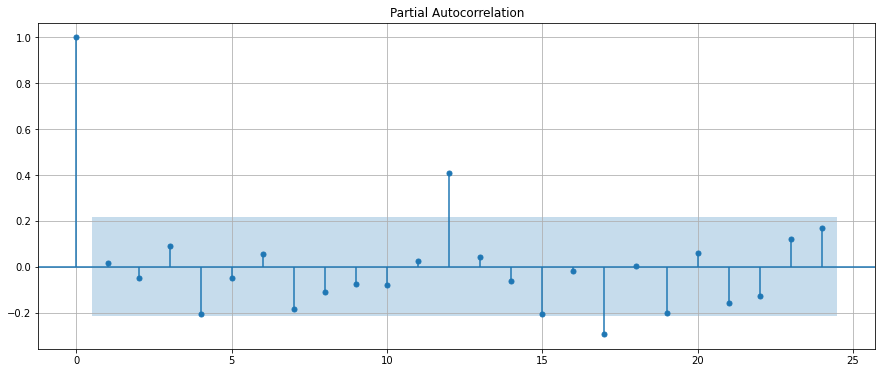

In [98]:
plot_pacf(residuos_arima, lags=24)
plt.grid(True)
plt.show()

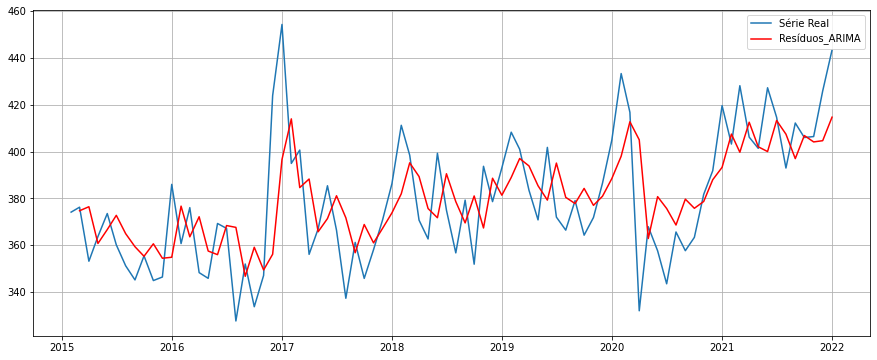

In [99]:
plt.plot(serie3, label="Série Real")
plt.plot(serie3-residuos_arima, color="red", label="Resíduos_ARIMA")
plt.legend(loc="best")
plt.grid(True)
plt.show()

**Previsão da Série Temporal**

In [100]:
#**Previsão da Série Temporal**
resultado_arima.fittedvalues

2015-02-28     0.586816
2015-03-31     0.196680
2015-04-30     7.571866
2015-05-31     2.976259
2015-06-30    -0.761951
                ...    
2021-08-31     4.017260
2021-09-30    -5.344374
2021-10-31    -1.883352
2021-11-30    -1.765268
2021-12-31   -11.180718
Freq: M, Length: 83, dtype: float64

In [101]:
previsao_arima = resultado_arima.predict(start=len(df2), end=len(df2)+11)
previsao_arima

2022-01-31   -19.840672
2022-02-28    -9.374304
2022-03-31    -4.270556
2022-04-30    -1.781799
2022-05-31    -0.568199
2022-06-30     0.023592
2022-07-31     0.312170
2022-08-31     0.452889
2022-09-30     0.521509
2022-10-31     0.554970
2022-11-30     0.571287
2022-12-31     0.579244
Freq: M, dtype: float64

In [102]:
previsao_arima2 = resultado_arima.forecast(len(previsao_arima))
previsao_arima2[0]

array([423.51967776, 414.14537388, 409.87481783, 408.09301834,
       407.52481902, 407.54841137, 407.86058094, 408.31347033,
       408.83497937, 409.38994961, 409.96123666, 410.54048031])

In [103]:
previsao_arima2 = pd.DataFrame(previsao_arima2[0])
previsao_arima2.columns =['Previsao-ARIMA']

In [104]:
indice2 = pd.date_range('2022', periods=12, freq='M')
indice2

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

In [105]:
previsaoarima = pd.Series(previsao_arima2['Previsao-ARIMA'].values, index=indice2)
previsaoarima

2022-01-31    423.519678
2022-02-28    414.145374
2022-03-31    409.874818
2022-04-30    408.093018
2022-05-31    407.524819
2022-06-30    407.548411
2022-07-31    407.860581
2022-08-31    408.313470
2022-09-30    408.834979
2022-10-31    409.389950
2022-11-30    409.961237
2022-12-31    410.540480
Freq: M, dtype: float64

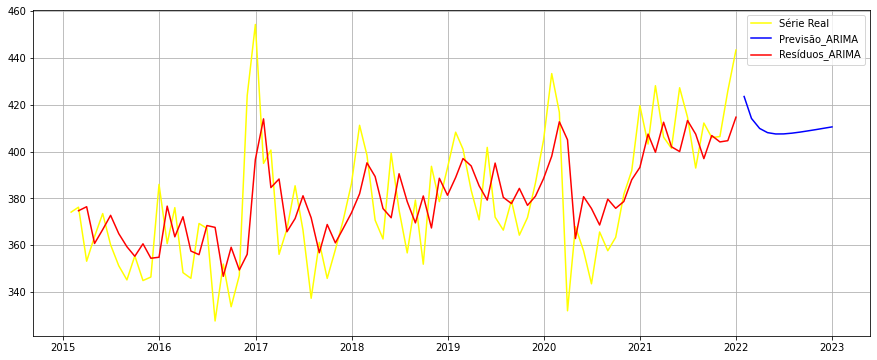

In [106]:
plt.plot(serie3, color='yellow', label='Série Real')
plt.plot(previsaoarima, color='blue', label='Previsão_ARIMA')
plt.plot(serie3-residuos_arima,color='red', label='Resíduos_ARIMA')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [107]:
prev_escala_arima = pd.DataFrame(previsaoarima**3, columns=["Previsão_ARIMA"])
prev_escala_arima.to_csv(destino + 'Previsao_ARIMA.csv', index  = False, sep=";")
prev_escala_arima.to_excel(destino + 'Previsao_ARIMA.xlsx')
prev_escala_arima
# pd.concat([serie, prev_escala_arima]).plot()
# plt.grid(True);


,Previsão_ARIMA
2022-01-31,7.596627e+07
2022-02-28,7.103272e+07
2022-03-31,6.885789e+07
2022-04-30,6.796378e+07
2022-05-31,6.768029e+07
2022-06-30,6.769204e+07
2022-07-31,6.784771e+07
2022-08-31,6.807398e+07
2022-09-30,6.833515e+07
2022-10-31,6.861381e+07


# **MODELO AUTOARIMA**

> * Modelo arima:(p=ordem de autorregressão, d=grau de diferenciação, q=ordem de média móvel)
> * Modelo ar:(p,0,q)

In [108]:
# AUTOARIMA - # **MODELO AUTOARIMA**
# Trace: apresenta no console a lista dos modelos
# Stepwise: seleção gradual(processo mais rápido, porém menos minuncioso)
# m: período sazonal (neste caso mensal).
# Interessante dobrar as ordens máximas: max.p = 10, max.q = 10, max.P = 10, max.Q = 10
modelo_auto = auto_arima(serie3, 
                         trace=True, 
                         stepwise = False, 
                         seasonal=True, 
                         max_p= 10, 
                         max_q= 10, 
                         max_P= 4, 
                         max_Q=4,
                         start_p=0, 
                         start_q=0, 
                         start_P=0, 
                         start_Q=0, 
                         m=12)

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=769.769, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=761.686, Time=0.03 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=760.178, Time=0.08 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=761.709, Time=0.17 sec
 ARIMA(0,1,0)(0,0,4)[12] intercept   : AIC=763.534, Time=0.38 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=758.750, Time=0.06 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(1,0,4)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=757.963, Time=0.09 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(2,0,3)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,0)(3,0,0)[12] intercept   : AIC=759.253, Time=0.24 sec
 ARIMA(0,1,0)(3,0,1)[12] intercept   :

In [109]:
print(modelo_auto.aic())

732.9767766596923


In [110]:
resultado_auto = modelo_auto.fit(serie3)
print(resultado_auto.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -360.488
Date:                            Sun, 10 Apr 2022   AIC                            732.977
Time:                                    16:37:12   BIC                            747.490
Sample:                                         0   HQIC                           738.807
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0032      0.027      0.119      0.905      -0.050       0.056
ar.L1          0.4437      0.102   

> * Melhor AR: AIC = 764.276  = (1,0,0)   
> * Melhor MA: AIC = 766.462 = (0,0,3)                                                                                                                                            
> * Melhor ARMA: AIC = 764.284 = (3,0,2)
> * Melhor ARIMA: AIC = 753.039 = (1,1,1)
> * Melhor AUTOARIMA: AIC = 732.977 = (1,1,1)(1,0,1)

**Analisar Resíduos**

In [111]:
#**Analisar Resíduos**
residuos_auto = resultado_auto.resid

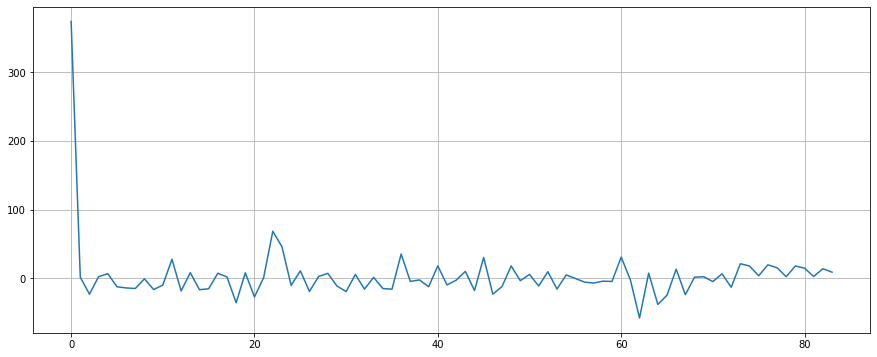

In [112]:
plt.plot(residuos_auto())
plt.grid(True)
plt.show()

**Normalidade**

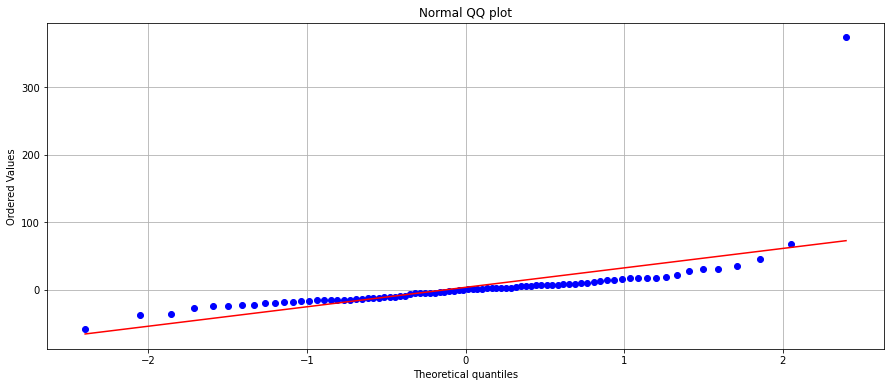

In [113]:
#**Normalidade**
stats.probplot(residuos_auto(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.grid(True)
plt.show()

In [114]:
e, p = stats.shapiro(residuos_auto())
print("Estatística do teste: {}".format(e))
print("p-valor: {}".format(p))

Estatística do teste: 0.422995388507843
p-valor: 1.5272185356985307e-16


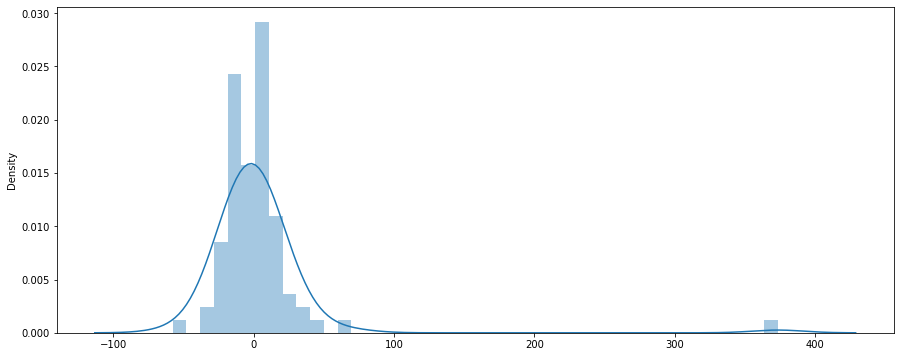

In [115]:
sns.distplot(residuos_auto());

**Autocorrelação**

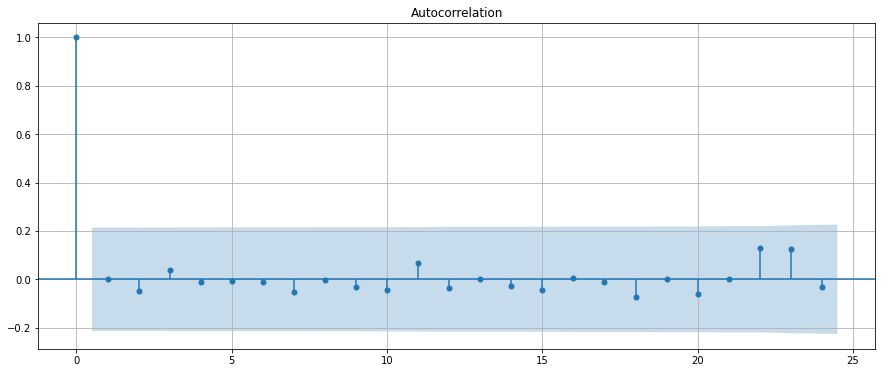

In [116]:
#**Autocorrelação**
plot_acf(residuos_auto(), lags=24)
plt.grid(True)
plt.show()

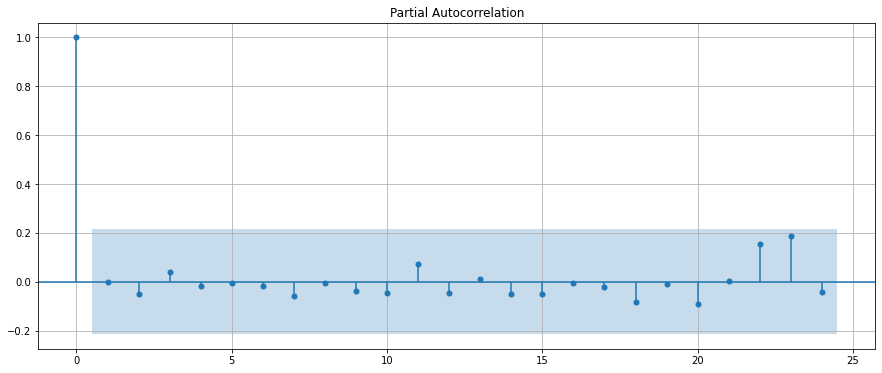

In [117]:
plot_pacf(residuos_auto(), lags=24)
plt.grid(True)
plt.show()

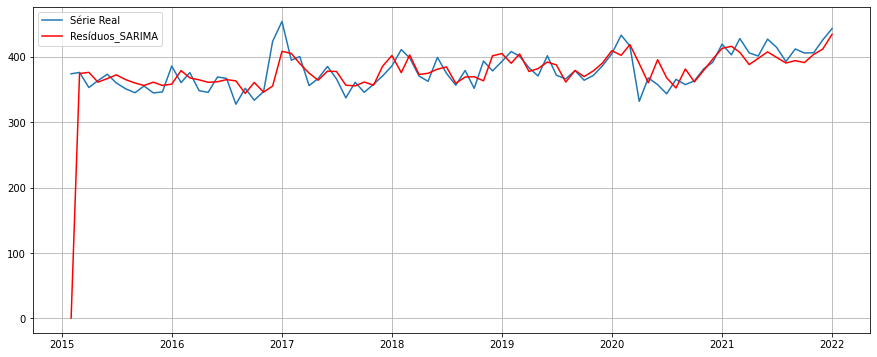

In [118]:
plt.plot(serie3, label="Série Real")
plt.plot(serie3-residuos_auto(), color="red", label="Resíduos_SARIMA")
plt.legend(loc="best")
plt.grid(True)
plt.show()

**Previsão da Série temporal**

In [119]:
# **Previsão da Série temporal**
previsao_auto = resultado_auto.predict(n_periods=12)
previsao_auto

array([430.36180083, 427.71725436, 396.34374327, 399.18101571,
       414.63915246, 400.90258823, 389.79763838, 400.17970161,
       392.68620979, 402.59471713, 416.39858814, 435.41173847])

In [120]:
previsao_auto = pd.DataFrame(previsao_auto)
previsao_auto.columns =['Previsao-SARIMA']

In [121]:
indice2 = pd.date_range('2022', periods=12, freq='M')
indice2

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

In [122]:
previsao_auto = pd.Series(previsao_auto['Previsao-SARIMA'].values, index=indice2)
previsao_auto

2022-01-31    430.361801
2022-02-28    427.717254
2022-03-31    396.343743
2022-04-30    399.181016
2022-05-31    414.639152
2022-06-30    400.902588
2022-07-31    389.797638
2022-08-31    400.179702
2022-09-30    392.686210
2022-10-31    402.594717
2022-11-30    416.398588
2022-12-31    435.411738
Freq: M, dtype: float64

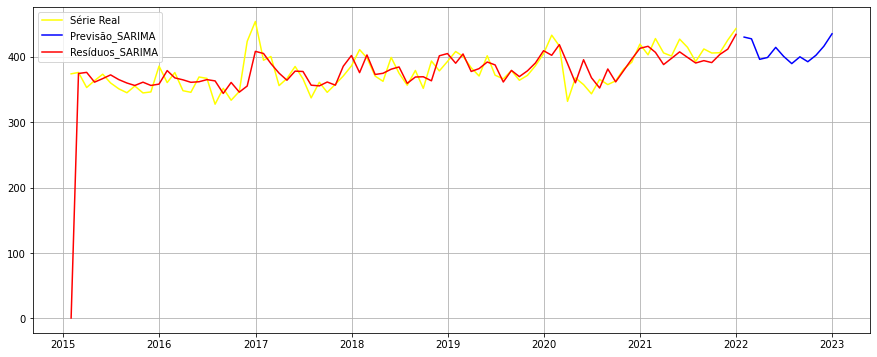

In [123]:
plt.plot(serie3, color='yellow', label='Série Real')
plt.plot(previsao_auto, color='blue', label='Previsão_SARIMA')
plt.plot(serie3-residuos_auto(),color='red', label='Resíduos_SARIMA')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [124]:
prev_escala_auto = pd.DataFrame(previsao_auto**3, columns = ["Previsão_SARIMA"])
prev_escala_auto.to_csv(destino + 'Previsao_SARIMA.csv', index  = False, sep=";")
prev_escala_auto.to_excel(destino + 'Previsao_SARIMA.xlsx')
prev_escala_auto
# pd.concat([serie, prev_escala_auto]).plot()
# plt.grid(True)

,Previsão_SARIMA
2022-01-31,7.970786e+07
2022-02-28,7.824747e+07
2022-03-31,6.226099e+07
2022-04-30,6.360769e+07
2022-05-31,7.128710e+07
2022-06-30,6.443422e+07
2022-07-31,5.922671e+07
2022-08-31,6.408630e+07
2022-09-30,6.055318e+07
2022-10-31,6.525356e+07


> * Melhor AR: AIC = 764.276  = (1,0,0)   
> * Melhor MA: AIC = 766.462 = (0,0,3)                                                                                                                                            
> * Melhor ARMA: AIC = 764.284 = (3,0,2)
> * Melhor ARIMA: AIC = 753.039 = (1,1,1)
> * Melhor AUTOARIMA: AIC = 732.977 = (1,1,1)(1,0,1)


# **MEDIDAS DE PRECISÃO**

In [125]:
arrecadacao2022 = [86361352.34,
                   108123085.53]
#indice2 = pd.date_range('2021', periods=12, freq='M')
valores_reais = pd.DataFrame(arrecadacao2022, columns = ['Valores reais'])
valores_reais


,Valores reais
0,8.636135e+07
1,1.081231e+08


In [126]:
ar = prev_escala_ar
pd.DataFrame.reset_index(ar, drop=True, inplace=True)
ar

,Previsão_AR
0,7.336277e+07
1,6.573148e+07
2,6.135798e+07
3,5.879437e+07
4,5.727007e+07
5,5.635565e+07
6,5.580407e+07
7,5.547024e+07
8,5.526778e+07
9,5.514483e+07


In [127]:
ma = prev_escala_ma
pd.DataFrame.reset_index(ma, drop=True, inplace=True)
ma

,Previsão_MA
0,7.227192e+07
1,6.457274e+07
2,5.959923e+07
3,5.484701e+07
4,5.484701e+07
5,5.484701e+07
6,5.484701e+07
7,5.484701e+07
8,5.484701e+07
9,5.484701e+07


In [128]:
arma = prev_escala_arma
pd.DataFrame.reset_index(arma, drop=True, inplace=True)
arma

,Previsão_ARMA
0,7.850448e+07
1,7.356813e+07
2,6.184307e+07
3,6.208898e+07
4,6.252603e+07
5,5.515931e+07
6,5.757950e+07
7,5.928724e+07
8,5.320298e+07
9,5.628492e+07


In [129]:
arima = prev_escala_arima
pd.DataFrame.reset_index(arima, drop=True, inplace=True)
arima

,Previsão_ARIMA
0,7.596627e+07
1,7.103272e+07
2,6.885789e+07
3,6.796378e+07
4,6.768029e+07
5,6.769204e+07
6,6.784771e+07
7,6.807398e+07
8,6.833515e+07
9,6.861381e+07


In [130]:
sarima = prev_escala_auto
pd.DataFrame.reset_index(sarima, drop=True, inplace=True)
round(arima,2)

,Previsão_ARIMA
0,75966266.12
1,71032719.76
2,68857889.90
3,67963775.21
4,67680286.69
5,67692041.77
6,67847711.03
7,68073976.88
8,68335147.96
9,68613809.12


In [131]:
# Lendo Previsao_Consolidada
receita_se_consolidado = pd.read_csv(origem + "Receita_SE_2021.csv")
receita_se_consolidado.columns = [
                   'COD_ORGAO',
                   'SGL_ORGAO',
                   'MES',
                   'ANO',
                   'COD_UNIDADE_GOV',
                   'SGL_UNIDADE_GOV',
                   'COD_FONTE_RECURSO',
                   'NOM_FONTE_RECURSO',
                   'COD_NATUREZA', 
                   'VL_ARRECADADO']
receita_se_consolidado['ANO'] = receita_se_consolidado['ANO'].astype(str)
receita_se_consolidado['MES'] = receita_se_consolidado['MES'].astype(str)
receita_se_consolidado = receita_se_consolidado.loc[receita_se_consolidado['SGL_ORGAO'] == SGL_ORGAO]
receita_se_consolidado = receita_se_consolidado.loc[receita_se_consolidado['COD_FONTE_RECURSO'] == 103000000]
# Criando uma nova coluna com mês e ano
receita_se_consolidado["ANO_MES"] = receita_se_consolidado['MES'] + "/" + receita_se_consolidado['ANO']
receita_se_consolidado["ANO_MES"] = pd.to_datetime(receita_se_consolidado["ANO_MES"])
receita_se_consolidado = receita_se_consolidado.drop([
                    'COD_ORGAO',
                    'MES',
                    'ANO',
                    'SGL_ORGAO',
                    'SGL_UNIDADE_GOV',
                    'COD_UNIDADE_GOV',
                    'COD_FONTE_RECURSO',
                    'NOM_FONTE_RECURSO',
                    'COD_NATUREZA'], 
                   axis=1)
receita_se_consolidado = receita_se_consolidado[['ANO_MES','VL_ARRECADADO',]]
receita_se_consolidado = pd.DataFrame(receita_se_consolidado.groupby(['ANO_MES'])['VL_ARRECADADO'].agg('sum'))
pd.DataFrame.reset_index(receita_se_consolidado, drop=True, inplace=True)
receita_se_consolidado.rename(columns = {'VL_ARRECADADO':'Arrecadação_2021'}, inplace=True)
receita_se_consolidado

,Arrecadação_2021
0,65557080.29
1,78474178.70
2,67008015.07
3,64670295.53
4,77992934.74
5,71298380.07
6,60688195.10
7,70035559.06
8,66928504.13
9,67131312.87


In [132]:
rec_fed_fundeb = rec_fed_fundeb
pd.DataFrame.reset_index(rec_fed_fundeb, drop=True, inplace=True)
round(rec_fed_fundeb,2)

,VL_ARREC_FED
0,65557080.29
1,78474178.70
2,67007997.68
3,64669263.16
4,72381664.42
5,71298380.07
6,60688195.10
7,70031710.50
8,66928504.13
9,67131312.87


In [133]:
prev_rec_consolidada = pd.concat([receita_se_consolidado, rec_fed_fundeb, round(arma,2), round(arima,2), round(sarima,2)], axis=1)
prev_rec_consolidada

,Arrecadação_2021,VL_ARREC_FED,Previsão_ARMA,Previsão_ARIMA,Previsão_SARIMA
0,65557080.29,65557080.29,78504481.58,75966266.12,79707859.83
1,78474178.70,78474178.70,73568130.65,71032719.76,78247471.19
2,67008015.07,67007997.68,61843073.36,68857889.90,62260989.75
3,64670295.53,64669263.16,62088979.57,67963775.21,63607691.87
4,77992934.74,72381664.42,62526027.65,67680286.69,71287096.16
5,71298380.07,71298380.07,55159311.22,67692041.77,64434220.68
6,60688195.10,60688195.10,57579503.24,67847711.03,59226710.30
7,70035559.06,70031710.50,59287244.93,68073976.88,64086295.53
8,66928504.13,66928504.13,53202984.53,68335147.96,60553179.31
9,67131312.87,67131312.87,56284921.51,68613809.12,65253560.76


In [134]:
prev_rec_consolidada .to_excel(destino + 'Previsao_Consolidada.xlsx')
prev_rec_consolidada .to_csv(destino + 'Previsao_Consolidada.csv')
for x, y, z in os.walk(destino):
  for arquivo in z:
    if 'Previsao_Consolidada' in arquivo:
        print(f'O arquivo "{arquivo}"" foi salvo com sucesso.')

O arquivo "Previsao_Consolidada.csv"" foi salvo com sucesso.
O arquivo "Previsao_Consolidada.xlsx"" foi salvo com sucesso.


In [135]:
prev_consolidada = pd.concat([valores_reais, ar[:2], ma[:2], arma[:2], arima[:2], sarima[:2]], axis=1)
prev_consolidada

,Valores reais,Previsão_AR,Previsão_MA,Previsão_ARMA,Previsão_ARIMA,Previsão_SARIMA
0,8.636135e+07,7.336277e+07,7.227192e+07,7.850448e+07,7.596627e+07,7.970786e+07
1,1.081231e+08,6.573148e+07,6.457274e+07,7.356813e+07,7.103272e+07,7.824747e+07


**ERRO MÉDIO ABSOLUTO (MAE)**

In [136]:
#**ERRO MÉDIO ABSOLUTO (MAE)**
print("ERRO MÉDIO ABSOLUTO (MAE)")

mae_ar = mean_absolute_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_AR"])
print("AR: {:.2f}".format(mae_ar))

mae_ma = mean_absolute_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_MA"])
print("MA: {:.2f}".format(mae_ma))

mae_arma = mean_absolute_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_ARMA"])
print("ARMA: {:.2f}".format(mae_arma))

mae_arima = mean_absolute_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_ARIMA"])
print("ARIMA: {:.2f}".format(mae_arima))

mae_sarima = mean_absolute_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_SARIMA"])
print("SARIMA: {:.2f}".format(mae_sarima))



ERRO MÉDIO ABSOLUTO (MAE)
AR: 27695094.18
MA: 28819891.11
ARMA: 21205912.82
ARIMA: 23742726.00
SARIMA: 18264553.43


**ERRO QUADRATICO MÉDIO (MSE)**

In [137]:
#**ERRO QUADRATICO MÉDIO (MSE)**
print("ERRO QUADRATICO MÉDIO (MSE)")

mse_ar = mean_squared_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_AR"])
print("AR: {:.2f}".format(mse_ar))

mse_ma = mean_squared_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_MA"])
print("MA: {:.2f}".format(mse_ma))

mse_arma = mean_squared_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_ARMA"])
print("ARMA: {:.2f}".format(mse_arma))

mse_arima = mean_squared_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_ARIMA"])
print("ARIMA: {:.2f}".format(mse_arima))

mse_sarima = mean_squared_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_SARIMA"])
print("SARIMA: {:.2f}".format(mse_sarima))

ERRO QUADRATICO MÉDIO (MSE)
AR: 983005751248918.00
MA: 1047572404508806.75
ARMA: 627887662418409.38
ARIMA: 741876525361562.25
SARIMA: 468410647332676.25


**RAIZ DO ERRO QUADRÁTIVO MÉDIO (RMSE)**

In [138]:
#**RAIZ DO ERRO QUADRÁTIVO MÉDIO (RMSE)**
print("RAIZ DO ERRO QUADRÁTIVO MÉDIO (RMSE")

rmse_ar = mean_squared_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_AR"], squared=False)
print("AR: {:.2f}".format(rmse_ar))

rmse_ma = mean_squared_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_MA"], squared=False)
print("MA: {:.2f}".format(rmse_ma))

rmse_arma = mean_squared_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_ARMA"], squared=False)
print("ARMA: {:.2f}".format(rmse_arma))

rmse_arima = mean_squared_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_ARIMA"], squared=False)
print("ARIMA: {:.2f}".format(rmse_arima))

rmse_sarima = mean_squared_error(prev_consolidada["Valores reais"], 
                                 prev_consolidada["Previsão_SARIMA"], squared=False)
print("SARIMA: {:.2f}".format(rmse_sarima))

RAIZ DO ERRO QUADRÁTIVO MÉDIO (RMSE
AR: 31352922.53
MA: 32366223.20
ARMA: 25057686.69
ARIMA: 27237410.40
SARIMA: 21642796.66


# **INTERPRETAÇÃO DOS RESULTADOS**

## **NÍVEL DE SIGNIFICÂNCIA**

<table class="ArticleTableNoBorder">
    <tbody>
		<tr>
			<td><strong>Série</strong></td>
			<td><strong>Shapiro-Wilk</strong></td>
            <td><strong>KPSS (5%)</strong></td>
		</tr>
		<tr>
			<td><code>Série Original</code></td>
			<td>0.0027</td>
            <td>0.4630</td>
		</tr>
        <tr>
			<td><code>Série Logarítmica</code></td>
			<td>0.2927</td>
            <td>0.4630</td>
		</tr>
        <tr>
			<td><code>Série Cúbica</code></td>
			<td>0.0920</td>
            <td>0.4630</td>
		</tr>
    </tbody>
</table>

TESTE SHAPIRO-WILK
> *CRITÉRIOS*:
> * NÍVEL DE SIGNIFICÂNCIA DE 0,05 OU 5% (MAIS UTILIZADO)
> * Ho = Distribuição normal p > 0,05
> * Ha = Distribuição não normal p <= 0,05

TESTE KPSS (KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN)
> *CRITÉRIOS*:
> * Ho = Não é estacionário: estatístitica do teste > valor crítico
> * Ha = É estacionário: estatística do teste < valor crítico 

## **COMPARAÇÃO DOS MODELOS**

<table class="ArticleTableNoBorder">
    <tbody>
		<tr>
			<td><strong>Modelo</strong></td>
			<td><strong>Melhor AIC</strong></td>
            <td><strong>(p,d,q)</strong></td>
            <td><strong>MAE</strong></td>
            <td><strong>MSE</strong></td>
            <td><strong>RMSE</strong></td>
		</tr>
		<tr>
			<td><code>AR</code></td>
			<td>764.276</td>
            <td>(1,0,0)</td>
            <td>27695094.18</td>
            <td>983005751248918.00</td>
            <td>31352922.53</td>
		</tr>
        <tr>
			<td><code>MA</code></td>
			<td>766.462</td>
            <td>(0,0,3)</td>
            <td>28819891.11</td>
            <td>1047572404508806.75</td>
            <td>32366223.20</td>
		</tr>
        <tr>
			<td><code>ARMA</code></td>
			<td>764.284</td>
            <td>(3,0,2)</td>
            <td>21205912.82</td>
            <td>627887662418409.38</td>
            <td>25057686.69</td>
		</tr>
        <tr>
			<td><code>ARIMA</code></td>
			<td>753.039</td>
            <td>(1,1,1)</td>
            <td>23742726.00</td>
            <td>741876525361562.25</td>
            <td>27237410.40</td>
		</tr>
        <tr>
			<td><code>SARIMA</code></td>
			<td>732.977</td>
            <td>(1,1,1)(1,0,1)</td>
            <td>18264553.43</td> 
            <td>468410647332676.25</td>
            <td>21642796.66</td>
		</tr>   
    </tbody>
</table>

## **(FUNDEB) DECLARAÇÃO DE ARREC.-SE 2021 X DISTRIB.-TESOURO NACIONAL 2021**

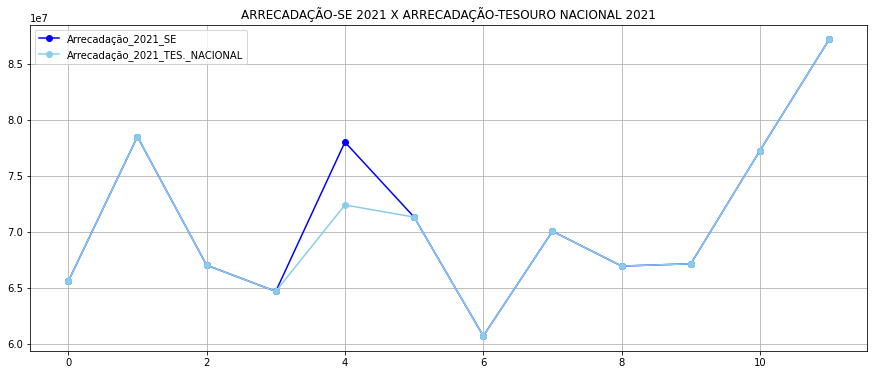

In [139]:
# GERANDO GRÁFICO ARRECADAÇÃO-SE 2021 X ARRECADAÇÃO-TESOURO NACIONAL 2021
plt.plot(prev_rec_consolidada['Arrecadação_2021'],'o-', color='blue', label='Arrecadação_2021_SE')
plt.plot(prev_rec_consolidada['VL_ARREC_FED'],'o-',color='skyblue', label='Arrecadação_2021_TES._NACIONAL')
plt.legend(loc='best')
plt.title('ARRECADAÇÃO-SE 2021 X ARRECADAÇÃO-TESOURO NACIONAL 2021')
plt.grid(True)
plt.show()



In [140]:
# DECLARAÇÃO DE ARRECADAÇÃO-SE 2021 X ARRECADAÇÃO-TESOURO NACIONAL 2021.
rec_declarada = pd.concat([receita_se_consolidado, rec_fed_fundeb], axis=1)
rec_declarada['Dif.'] = round(rec_fed_fundeb['VL_ARREC_FED']- receita_se_consolidado['Arrecadação_2021'],2)
rec_declarada['%.'] = round(((rec_fed_fundeb['VL_ARREC_FED']/prev_rec_consolidada['Arrecadação_2021'])-1)*100,2)
rec_declarada

,Arrecadação_2021,VL_ARREC_FED,Dif.,%.
0,65557080.29,65557080.29,0.00,0.00
1,78474178.70,78474178.70,0.00,0.00
2,67008015.07,67007997.68,-17.39,-0.00
3,64670295.53,64669263.16,-1032.37,-0.00
4,77992934.74,72381664.42,-5611270.32,-7.19
5,71298380.07,71298380.07,0.00,0.00
6,60688195.10,60688195.10,0.00,0.00
7,70035559.06,70031710.50,-3848.56,-0.01
8,66928504.13,66928504.13,-0.00,-0.00
9,67131312.87,67131312.87,0.00,0.00


## **(FUNDEB) PREVISÃO ARRECADAÇÃO-SE 2022 X PREVISÃO ARRECADAÇÃO-SE 2021**

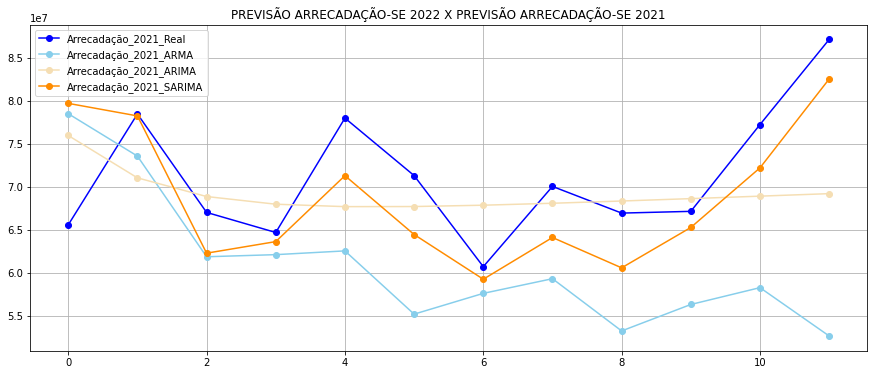

In [141]:
# GERANDO GRÁFICO DAS PREVISÕES
plt.plot(prev_rec_consolidada['Arrecadação_2021'],'o-', color='blue', label='Arrecadação_2021_Real')
plt.plot(prev_rec_consolidada['Previsão_ARMA'],'o-',color='skyblue', label='Arrecadação_2021_ARMA')
plt.plot(prev_rec_consolidada['Previsão_ARIMA'],'o-',color='wheat', label='Arrecadação_2021_ARIMA')
plt.plot(prev_rec_consolidada['Previsão_SARIMA'],'o-',color='darkorange', label='Arrecadação_2021_SARIMA')
plt.legend(loc='best')
plt.title('PREVISÃO ARRECADAÇÃO-SE 2022 X PREVISÃO ARRECADAÇÃO-SE 2021')
plt.grid(True)
plt.show()

In [142]:
# PREVISÃO ARRECADAÇÃO 2022 EM RELAÇÃO A 2021.
prev_rec_consolidada['%_ARMA'] = round(((prev_rec_consolidada['Previsão_ARMA']/prev_rec_consolidada['Arrecadação_2021'])-1)*100,2)
prev_rec_consolidada['%_ARIMA'] = round(((prev_rec_consolidada['Previsão_ARIMA']/prev_rec_consolidada['Arrecadação_2021'])-1)*100,2)
prev_rec_consolidada['%_SARIMA'] = round(((prev_rec_consolidada['Previsão_SARIMA']/prev_rec_consolidada['Arrecadação_2021'])-1)*100,2)
prev_rec_consolidada.to_csv(destino + 'Previsão_Arrecadação_2022.csv')
prev_rec_consolidada.to_excel(destino + 'Previsão_Arrecadação_2022.xlsx')
prev_rec_consolidada


,Arrecadação_2021,VL_ARREC_FED,Previsão_ARMA,Previsão_ARIMA,Previsão_SARIMA,%_ARMA,%_ARIMA,%_SARIMA
0,65557080.29,65557080.29,78504481.58,75966266.12,79707859.83,19.75,15.88,21.59
1,78474178.70,78474178.70,73568130.65,71032719.76,78247471.19,-6.25,-9.48,-0.29
2,67008015.07,67007997.68,61843073.36,68857889.90,62260989.75,-7.71,2.76,-7.08
3,64670295.53,64669263.16,62088979.57,67963775.21,63607691.87,-3.99,5.09,-1.64
4,77992934.74,72381664.42,62526027.65,67680286.69,71287096.16,-19.83,-13.22,-8.60
5,71298380.07,71298380.07,55159311.22,67692041.77,64434220.68,-22.64,-5.06,-9.63
6,60688195.10,60688195.10,57579503.24,67847711.03,59226710.30,-5.12,11.80,-2.41
7,70035559.06,70031710.50,59287244.93,68073976.88,64086295.53,-15.35,-2.80,-8.49
8,66928504.13,66928504.13,53202984.53,68335147.96,60553179.31,-20.51,2.10,-9.53
9,67131312.87,67131312.87,56284921.51,68613809.12,65253560.76,-16.16,2.21,-2.80
